In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import urllib
import cv2
import re
from PIL import Image, ImageOps
%matplotlib inline

/Users/irisz/env/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/Users/irisz/env/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
carmax = pd.read_csv('../data/carmax_final_data.csv')
carvana = pd.read_csv('../data/carvana_final_data.csv')

In [3]:
carmax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50580 entries, 0 to 50579
Data columns (total 10 columns):
Unnamed: 0    50580 non-null int64
model         50580 non-null object
price         50580 non-null int64
mileage       50580 non-null int64
src           50580 non-null object
type          50580 non-null object
year          50580 non-null int64
make          50580 non-null object
trim          50580 non-null object
image-type    50580 non-null object
dtypes: int64(4), object(6)
memory usage: 3.9+ MB


In [4]:
carvana.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12426 entries, 0 to 12425
Data columns (total 10 columns):
Unnamed: 0    12426 non-null int64
make          12426 non-null object
model         12426 non-null object
trim          12426 non-null object
type          12426 non-null object
price         12426 non-null int64
mileage       12426 non-null int64
src           12426 non-null object
year          12426 non-null int64
image-type    12426 non-null object
dtypes: int64(4), object(6)
memory usage: 970.9+ KB


In [5]:
carmax['org'] = 'carmax'
carvana['org'] = 'carvana'

In [6]:
carvana['id'] = carvana['Unnamed: 0']
carvana.drop('Unnamed: 0', axis=1, inplace=True)
carmax['id'] = carmax['Unnamed: 0']
carmax.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
carvana.head()

,make,model,trim,type,price,mileage,src,year,image-type,org,id
0,AUDI,A3,1.8T Premium Plus,convertible,22200,41822,cdnblob.carvana.io/2000291164/post-large/norma...,2015,original,carvana,0
1,JAGUAR,XK,XKR,convertible,34300,47179,cdnblob.carvana.io/2000287619/post-large/norma...,2011,original,carvana,1
2,MAZDA,MX-5 MIATA RF,Club,convertible,25700,6445,cdnblob.carvana.io/2000282627/post-large/norma...,2017,original,carvana,2
3,BMW,4 SERIES,428i,convertible,32800,17869,cdnblob.carvana.io/2000283685/post-large/norma...,2016,original,carvana,3
4,BMW,Z4,SDrive35i,convertible,32700,29380,cdnblob.carvana.io/2000277443/post-large/norma...,2015,original,carvana,4


In [8]:
carmax['make'] = carmax['make'].apply(lambda x: x.upper())

In [9]:
carmax.head()

,model,price,mileage,src,type,year,make,trim,image-type,org,id
0,undefined,19998,20000,https://img2.carmax.com/img/vehicles/17325462/...,sedan,2016,ACURA,ILX,original,carmax,0
1,undefined,21998,20000,https://img2.carmax.com/img/vehicles/17373223/...,sedan,2015,ACURA,TLX,original,carmax,1
2,undefined,19998,41000,https://img2.carmax.com/img/vehicles/17221103/...,sedan,2015,ACURA,TLX,original,carmax,2
3,undefined,17998,29000,https://img2.carmax.com/img/vehicles/17320660/...,sedan,2016,ACURA,ILX,original,carmax,3
4,undefined,20998,44000,https://img2.carmax.com/img/vehicles/15666950/...,sedan,2016,ACURA,TLX,original,carmax,4


In [10]:
all_cars = pd.concat([carmax, carvana], axis=0, ignore_index=True, sort=True)
all_cars = all_cars.sort_values('make').reset_index()
all_cars.drop('index', axis=1, inplace=True)

In [11]:
all_cars.head()

,id,image-type,make,mileage,model,org,price,src,trim,type,year
0,0,original,ACURA,20000,undefined,carmax,19998,https://img2.carmax.com/img/vehicles/17325462/...,ILX,sedan,2016
1,2607,original,ACURA,46319,TLX,carvana,19200,cdnblob.carvana.io/2000249304/post-large/norma...,3.5,sedan,2016
2,2614,original,ACURA,39069,TLX,carvana,19700,cdnblob.carvana.io/2000243521/post-large/norma...,3.5,sedan,2016
3,2652,original,ACURA,45517,TLX,carvana,19700,cdnblob.carvana.io/2000287679/post-large/norma...,2.4,sedan,2016
4,2671,original,ACURA,17525,ILX,carvana,18900,cdnblob.carvana.io/2000284758/post-large/norma...,ILX,sedan,2016


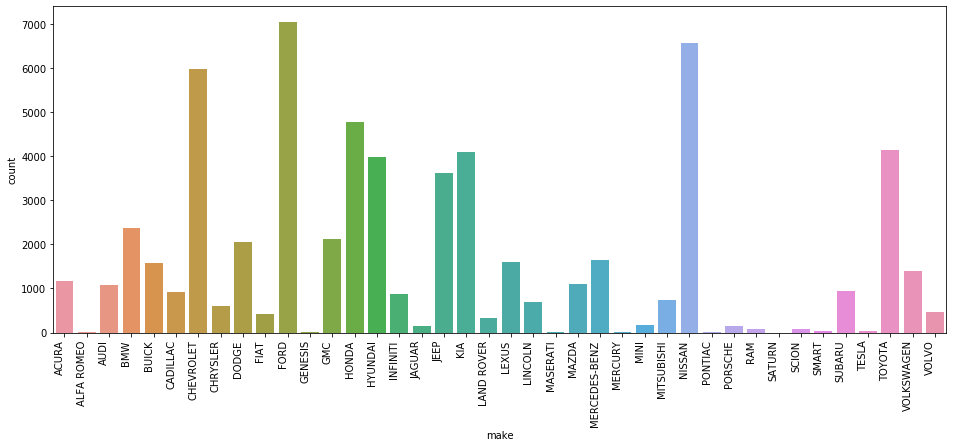

In [12]:
plt.figure(figsize=(16,6))
ax = sns.countplot(x='make', data=all_cars)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()

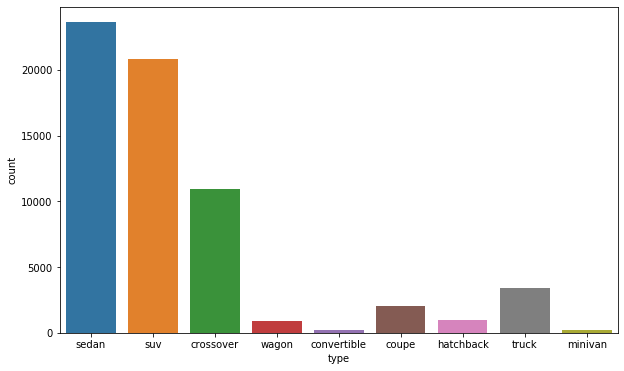

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(x='type', data=all_cars)

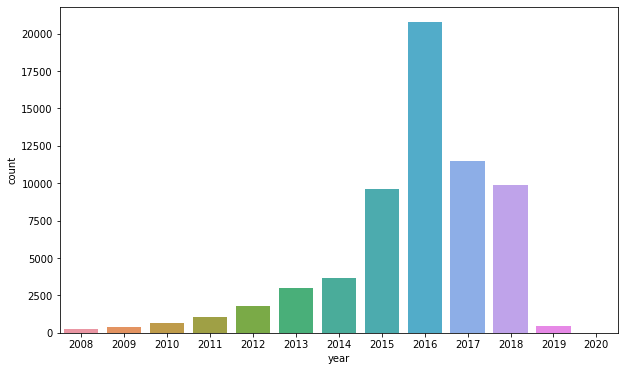

In [14]:
plt.figure(figsize=(10,6))
sns.countplot(x='year', data=all_cars)

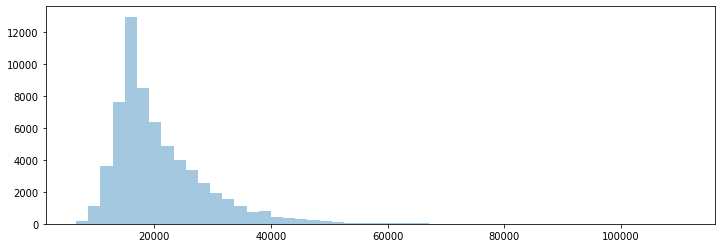

In [15]:
plt.figure(figsize=(12,4))
sns.distplot([all_cars['price']], kde=False)

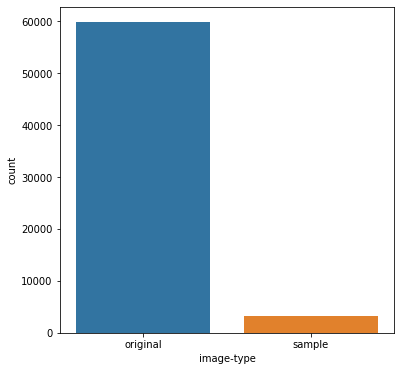

In [16]:
plt.figure(figsize=(6,6))
sns.countplot(x='image-type', data=all_cars)

In [18]:
len(all_cars[all_cars['image-type'] == 'original'])

59816

From all the data scraped, we are left with 60285 images of cars

In [19]:
def save_carmax(car_id, index):
    im_pth = '../images/carmax/' + str(car_id) + '.jpg'
    im = Image.open(im_pth)
    old_size = im.size
    ratio = float(desired_size)/max(old_size)
    new_size = tuple([int(x*ratio) for x in old_size])
    im = im.resize(new_size, Image.ANTIALIAS)
    new_im = Image.new("RGB", (desired_size, desired_size))
    new_im.paste(im, ((desired_size-new_size[0])//2,
                    (desired_size-new_size[1])//2))
    new_im.save('../images/final/' + str(desired_size) + '/' + str(index) + '.jpg')

In [20]:
def save_carvana(car_id, index):
    im_pth = '../images/carvana/' + str(car_id) + '.jpg'
    im = Image.open(im_pth)
    im = im.crop((73,0,673,im.size[1]))
    old_size = im.size
    ratio = float(desired_size)/max(old_size)
    new_size = tuple([int(x*ratio) for x in old_size])
    im = im.resize(new_size, Image.ANTIALIAS)
    new_im = Image.new("RGB", (desired_size, desired_size))
    new_im.paste(im, ((desired_size-new_size[0])//2,
                    (desired_size-new_size[1])//2))
    new_im = new_im.transpose(Image.FLIP_LEFT_RIGHT)
    new_im.save('../images/final/' + str(desired_size) + '/' + str(index) + '.jpg')

In [24]:
from os import listdir

In [25]:
carmax_path = '../images/carmax/'
carvana_path = '../images/carvana/'

In [37]:
carmax_car_id = sorted([int(f.split(".")[0]) for f in listdir(carmax_path)])
carvana_car_id = sorted([int(f.split(".")[0]) for f in listdir(carvana_path)])

In [46]:
total_cars = len(carmax_car_id) + len(carvana_car_id)
total_cars

60606

In [53]:
for i in range(len(carmax_car_id)):
    print("saving carmax" + str(i))
    save_carmax(i, i)

saving carmax0
saving carmax1
saving carmax2
saving carmax3
saving carmax4
saving carmax5
saving carmax6
saving carmax7
saving carmax8
saving carmax9
saving carmax10
saving carmax11
saving carmax12
saving carmax13
saving carmax14
saving carmax15
saving carmax16
saving carmax17
saving carmax18
saving carmax19
saving carmax20
saving carmax21
saving carmax22
saving carmax23
saving carmax24
saving carmax25
saving carmax26
saving carmax27
saving carmax28
saving carmax29
saving carmax30
saving carmax31
saving carmax32
saving carmax33
saving carmax34
saving carmax35
saving carmax36
saving carmax37
saving carmax38
saving carmax39
saving carmax40
saving carmax41
saving carmax42
saving carmax43
saving carmax44
saving carmax45
saving carmax46
saving carmax47
saving carmax48
saving carmax49
saving carmax50
saving carmax51
saving carmax52
saving carmax53
saving carmax54
saving carmax55
saving carmax56
saving carmax57
saving carmax58
saving carmax59
saving carmax60
saving carmax61
saving carmax62
sa

saving carmax493
saving carmax494
saving carmax495
saving carmax496
saving carmax497
saving carmax498
saving carmax499
saving carmax500
saving carmax501
saving carmax502
saving carmax503
saving carmax504
saving carmax505
saving carmax506
saving carmax507
saving carmax508
saving carmax509
saving carmax510
saving carmax511
saving carmax512
saving carmax513
saving carmax514
saving carmax515
saving carmax516
saving carmax517
saving carmax518
saving carmax519
saving carmax520
saving carmax521
saving carmax522
saving carmax523
saving carmax524
saving carmax525
saving carmax526
saving carmax527
saving carmax528
saving carmax529
saving carmax530
saving carmax531
saving carmax532
saving carmax533
saving carmax534
saving carmax535
saving carmax536
saving carmax537
saving carmax538
saving carmax539
saving carmax540
saving carmax541
saving carmax542
saving carmax543
saving carmax544
saving carmax545
saving carmax546
saving carmax547
saving carmax548
saving carmax549
saving carmax550
saving carmax5

saving carmax981
saving carmax982
saving carmax983
saving carmax984
saving carmax985
saving carmax986
saving carmax987
saving carmax988
saving carmax989
saving carmax990
saving carmax991
saving carmax992
saving carmax993
saving carmax994
saving carmax995
saving carmax996
saving carmax997
saving carmax998
saving carmax999
saving carmax1000
saving carmax1001
saving carmax1002
saving carmax1003
saving carmax1004
saving carmax1005
saving carmax1006
saving carmax1007
saving carmax1008
saving carmax1009
saving carmax1010
saving carmax1011
saving carmax1012
saving carmax1013
saving carmax1014
saving carmax1015
saving carmax1016
saving carmax1017
saving carmax1018
saving carmax1019
saving carmax1020
saving carmax1021
saving carmax1022
saving carmax1023
saving carmax1024
saving carmax1025
saving carmax1026
saving carmax1027
saving carmax1028
saving carmax1029
saving carmax1030
saving carmax1031
saving carmax1032
saving carmax1033
saving carmax1034
saving carmax1035
saving carmax1036
saving carm

saving carmax1448
saving carmax1449
saving carmax1450
saving carmax1451
saving carmax1452
saving carmax1453
saving carmax1454
saving carmax1455
saving carmax1456
saving carmax1457
saving carmax1458
saving carmax1459
saving carmax1460
saving carmax1461
saving carmax1462
saving carmax1463
saving carmax1464
saving carmax1465
saving carmax1466
saving carmax1467
saving carmax1468
saving carmax1469
saving carmax1470
saving carmax1471
saving carmax1472
saving carmax1473
saving carmax1474
saving carmax1475
saving carmax1476
saving carmax1477
saving carmax1478
saving carmax1479
saving carmax1480
saving carmax1481
saving carmax1482
saving carmax1483
saving carmax1484
saving carmax1485
saving carmax1486
saving carmax1487
saving carmax1488
saving carmax1489
saving carmax1490
saving carmax1491
saving carmax1492
saving carmax1493
saving carmax1494
saving carmax1495
saving carmax1496
saving carmax1497
saving carmax1498
saving carmax1499
saving carmax1500
saving carmax1501
saving carmax1502
saving car

saving carmax1907
saving carmax1908
saving carmax1909
saving carmax1910
saving carmax1911
saving carmax1912
saving carmax1913
saving carmax1914
saving carmax1915
saving carmax1916
saving carmax1917
saving carmax1918
saving carmax1919
saving carmax1920
saving carmax1921
saving carmax1922
saving carmax1923
saving carmax1924
saving carmax1925
saving carmax1926
saving carmax1927
saving carmax1928
saving carmax1929
saving carmax1930
saving carmax1931
saving carmax1932
saving carmax1933
saving carmax1934
saving carmax1935
saving carmax1936
saving carmax1937
saving carmax1938
saving carmax1939
saving carmax1940
saving carmax1941
saving carmax1942
saving carmax1943
saving carmax1944
saving carmax1945
saving carmax1946
saving carmax1947
saving carmax1948
saving carmax1949
saving carmax1950
saving carmax1951
saving carmax1952
saving carmax1953
saving carmax1954
saving carmax1955
saving carmax1956
saving carmax1957
saving carmax1958
saving carmax1959
saving carmax1960
saving carmax1961
saving car

saving carmax2377
saving carmax2378
saving carmax2379
saving carmax2380
saving carmax2381
saving carmax2382
saving carmax2383
saving carmax2384
saving carmax2385
saving carmax2386
saving carmax2387
saving carmax2388
saving carmax2389
saving carmax2390
saving carmax2391
saving carmax2392
saving carmax2393
saving carmax2394
saving carmax2395
saving carmax2396
saving carmax2397
saving carmax2398
saving carmax2399
saving carmax2400
saving carmax2401
saving carmax2402
saving carmax2403
saving carmax2404
saving carmax2405
saving carmax2406
saving carmax2407
saving carmax2408
saving carmax2409
saving carmax2410
saving carmax2411
saving carmax2412
saving carmax2413
saving carmax2414
saving carmax2415
saving carmax2416
saving carmax2417
saving carmax2418
saving carmax2419
saving carmax2420
saving carmax2421
saving carmax2422
saving carmax2423
saving carmax2424
saving carmax2425
saving carmax2426
saving carmax2427
saving carmax2428
saving carmax2429
saving carmax2430
saving carmax2431
saving car

saving carmax2841
saving carmax2842
saving carmax2843
saving carmax2844
saving carmax2845
saving carmax2846
saving carmax2847
saving carmax2848
saving carmax2849
saving carmax2850
saving carmax2851
saving carmax2852
saving carmax2853
saving carmax2854
saving carmax2855
saving carmax2856
saving carmax2857
saving carmax2858
saving carmax2859
saving carmax2860
saving carmax2861
saving carmax2862
saving carmax2863
saving carmax2864
saving carmax2865
saving carmax2866
saving carmax2867
saving carmax2868
saving carmax2869
saving carmax2870
saving carmax2871
saving carmax2872
saving carmax2873
saving carmax2874
saving carmax2875
saving carmax2876
saving carmax2877
saving carmax2878
saving carmax2879
saving carmax2880
saving carmax2881
saving carmax2882
saving carmax2883
saving carmax2884
saving carmax2885
saving carmax2886
saving carmax2887
saving carmax2888
saving carmax2889
saving carmax2890
saving carmax2891
saving carmax2892
saving carmax2893
saving carmax2894
saving carmax2895
saving car

saving carmax3309
saving carmax3310
saving carmax3311
saving carmax3312
saving carmax3313
saving carmax3314
saving carmax3315
saving carmax3316
saving carmax3317
saving carmax3318
saving carmax3319
saving carmax3320
saving carmax3321
saving carmax3322
saving carmax3323
saving carmax3324
saving carmax3325
saving carmax3326
saving carmax3327
saving carmax3328
saving carmax3329
saving carmax3330
saving carmax3331
saving carmax3332
saving carmax3333
saving carmax3334
saving carmax3335
saving carmax3336
saving carmax3337
saving carmax3338
saving carmax3339
saving carmax3340
saving carmax3341
saving carmax3342
saving carmax3343
saving carmax3344
saving carmax3345
saving carmax3346
saving carmax3347
saving carmax3348
saving carmax3349
saving carmax3350
saving carmax3351
saving carmax3352
saving carmax3353
saving carmax3354
saving carmax3355
saving carmax3356
saving carmax3357
saving carmax3358
saving carmax3359
saving carmax3360
saving carmax3361
saving carmax3362
saving carmax3363
saving car

saving carmax3777
saving carmax3778
saving carmax3779
saving carmax3780
saving carmax3781
saving carmax3782
saving carmax3783
saving carmax3784
saving carmax3785
saving carmax3786
saving carmax3787
saving carmax3788
saving carmax3789
saving carmax3790
saving carmax3791
saving carmax3792
saving carmax3793
saving carmax3794
saving carmax3795
saving carmax3796
saving carmax3797
saving carmax3798
saving carmax3799
saving carmax3800
saving carmax3801
saving carmax3802
saving carmax3803
saving carmax3804
saving carmax3805
saving carmax3806
saving carmax3807
saving carmax3808
saving carmax3809
saving carmax3810
saving carmax3811
saving carmax3812
saving carmax3813
saving carmax3814
saving carmax3815
saving carmax3816
saving carmax3817
saving carmax3818
saving carmax3819
saving carmax3820
saving carmax3821
saving carmax3822
saving carmax3823
saving carmax3824
saving carmax3825
saving carmax3826
saving carmax3827
saving carmax3828
saving carmax3829
saving carmax3830
saving carmax3831
saving car

saving carmax4237
saving carmax4238
saving carmax4239
saving carmax4240
saving carmax4241
saving carmax4242
saving carmax4243
saving carmax4244
saving carmax4245
saving carmax4246
saving carmax4247
saving carmax4248
saving carmax4249
saving carmax4250
saving carmax4251
saving carmax4252
saving carmax4253
saving carmax4254
saving carmax4255
saving carmax4256
saving carmax4257
saving carmax4258
saving carmax4259
saving carmax4260
saving carmax4261
saving carmax4262
saving carmax4263
saving carmax4264
saving carmax4265
saving carmax4266
saving carmax4267
saving carmax4268
saving carmax4269
saving carmax4270
saving carmax4271
saving carmax4272
saving carmax4273
saving carmax4274
saving carmax4275
saving carmax4276
saving carmax4277
saving carmax4278
saving carmax4279
saving carmax4280
saving carmax4281
saving carmax4282
saving carmax4283
saving carmax4284
saving carmax4285
saving carmax4286
saving carmax4287
saving carmax4288
saving carmax4289
saving carmax4290
saving carmax4291
saving car

saving carmax4709
saving carmax4710
saving carmax4711
saving carmax4712
saving carmax4713
saving carmax4714
saving carmax4715
saving carmax4716
saving carmax4717
saving carmax4718
saving carmax4719
saving carmax4720
saving carmax4721
saving carmax4722
saving carmax4723
saving carmax4724
saving carmax4725
saving carmax4726
saving carmax4727
saving carmax4728
saving carmax4729
saving carmax4730
saving carmax4731
saving carmax4732
saving carmax4733
saving carmax4734
saving carmax4735
saving carmax4736
saving carmax4737
saving carmax4738
saving carmax4739
saving carmax4740
saving carmax4741
saving carmax4742
saving carmax4743
saving carmax4744
saving carmax4745
saving carmax4746
saving carmax4747
saving carmax4748
saving carmax4749
saving carmax4750
saving carmax4751
saving carmax4752
saving carmax4753
saving carmax4754
saving carmax4755
saving carmax4756
saving carmax4757
saving carmax4758
saving carmax4759
saving carmax4760
saving carmax4761
saving carmax4762
saving carmax4763
saving car

saving carmax5171
saving carmax5172
saving carmax5173
saving carmax5174
saving carmax5175
saving carmax5176
saving carmax5177
saving carmax5178
saving carmax5179
saving carmax5180
saving carmax5181
saving carmax5182
saving carmax5183
saving carmax5184
saving carmax5185
saving carmax5186
saving carmax5187
saving carmax5188
saving carmax5189
saving carmax5190
saving carmax5191
saving carmax5192
saving carmax5193
saving carmax5194
saving carmax5195
saving carmax5196
saving carmax5197
saving carmax5198
saving carmax5199
saving carmax5200
saving carmax5201
saving carmax5202
saving carmax5203
saving carmax5204
saving carmax5205
saving carmax5206
saving carmax5207
saving carmax5208
saving carmax5209
saving carmax5210
saving carmax5211
saving carmax5212
saving carmax5213
saving carmax5214
saving carmax5215
saving carmax5216
saving carmax5217
saving carmax5218
saving carmax5219
saving carmax5220
saving carmax5221
saving carmax5222
saving carmax5223
saving carmax5224
saving carmax5225
saving car

saving carmax5643
saving carmax5644
saving carmax5645
saving carmax5646
saving carmax5647
saving carmax5648
saving carmax5649
saving carmax5650
saving carmax5651
saving carmax5652
saving carmax5653
saving carmax5654
saving carmax5655
saving carmax5656
saving carmax5657
saving carmax5658
saving carmax5659
saving carmax5660
saving carmax5661
saving carmax5662
saving carmax5663
saving carmax5664
saving carmax5665
saving carmax5666
saving carmax5667
saving carmax5668
saving carmax5669
saving carmax5670
saving carmax5671
saving carmax5672
saving carmax5673
saving carmax5674
saving carmax5675
saving carmax5676
saving carmax5677
saving carmax5678
saving carmax5679
saving carmax5680
saving carmax5681
saving carmax5682
saving carmax5683
saving carmax5684
saving carmax5685
saving carmax5686
saving carmax5687
saving carmax5688
saving carmax5689
saving carmax5690
saving carmax5691
saving carmax5692
saving carmax5693
saving carmax5694
saving carmax5695
saving carmax5696
saving carmax5697
saving car

saving carmax6103
saving carmax6104
saving carmax6105
saving carmax6106
saving carmax6107
saving carmax6108
saving carmax6109
saving carmax6110
saving carmax6111
saving carmax6112
saving carmax6113
saving carmax6114
saving carmax6115
saving carmax6116
saving carmax6117
saving carmax6118
saving carmax6119
saving carmax6120
saving carmax6121
saving carmax6122
saving carmax6123
saving carmax6124
saving carmax6125
saving carmax6126
saving carmax6127
saving carmax6128
saving carmax6129
saving carmax6130
saving carmax6131
saving carmax6132
saving carmax6133
saving carmax6134
saving carmax6135
saving carmax6136
saving carmax6137
saving carmax6138
saving carmax6139
saving carmax6140
saving carmax6141
saving carmax6142
saving carmax6143
saving carmax6144
saving carmax6145
saving carmax6146
saving carmax6147
saving carmax6148
saving carmax6149
saving carmax6150
saving carmax6151
saving carmax6152
saving carmax6153
saving carmax6154
saving carmax6155
saving carmax6156
saving carmax6157
saving car

saving carmax6559
saving carmax6560
saving carmax6561
saving carmax6562
saving carmax6563
saving carmax6564
saving carmax6565
saving carmax6566
saving carmax6567
saving carmax6568
saving carmax6569
saving carmax6570
saving carmax6571
saving carmax6572
saving carmax6573
saving carmax6574
saving carmax6575
saving carmax6576
saving carmax6577
saving carmax6578
saving carmax6579
saving carmax6580
saving carmax6581
saving carmax6582
saving carmax6583
saving carmax6584
saving carmax6585
saving carmax6586
saving carmax6587
saving carmax6588
saving carmax6589
saving carmax6590
saving carmax6591
saving carmax6592
saving carmax6593
saving carmax6594
saving carmax6595
saving carmax6596
saving carmax6597
saving carmax6598
saving carmax6599
saving carmax6600
saving carmax6601
saving carmax6602
saving carmax6603
saving carmax6604
saving carmax6605
saving carmax6606
saving carmax6607
saving carmax6608
saving carmax6609
saving carmax6610
saving carmax6611
saving carmax6612
saving carmax6613
saving car

saving carmax7022
saving carmax7023
saving carmax7024
saving carmax7025
saving carmax7026
saving carmax7027
saving carmax7028
saving carmax7029
saving carmax7030
saving carmax7031
saving carmax7032
saving carmax7033
saving carmax7034
saving carmax7035
saving carmax7036
saving carmax7037
saving carmax7038
saving carmax7039
saving carmax7040
saving carmax7041
saving carmax7042
saving carmax7043
saving carmax7044
saving carmax7045
saving carmax7046
saving carmax7047
saving carmax7048
saving carmax7049
saving carmax7050
saving carmax7051
saving carmax7052
saving carmax7053
saving carmax7054
saving carmax7055
saving carmax7056
saving carmax7057
saving carmax7058
saving carmax7059
saving carmax7060
saving carmax7061
saving carmax7062
saving carmax7063
saving carmax7064
saving carmax7065
saving carmax7066
saving carmax7067
saving carmax7068
saving carmax7069
saving carmax7070
saving carmax7071
saving carmax7072
saving carmax7073
saving carmax7074
saving carmax7075
saving carmax7076
saving car

saving carmax7490
saving carmax7491
saving carmax7492
saving carmax7493
saving carmax7494
saving carmax7495
saving carmax7496
saving carmax7497
saving carmax7498
saving carmax7499
saving carmax7500
saving carmax7501
saving carmax7502
saving carmax7503
saving carmax7504
saving carmax7505
saving carmax7506
saving carmax7507
saving carmax7508
saving carmax7509
saving carmax7510
saving carmax7511
saving carmax7512
saving carmax7513
saving carmax7514
saving carmax7515
saving carmax7516
saving carmax7517
saving carmax7518
saving carmax7519
saving carmax7520
saving carmax7521
saving carmax7522
saving carmax7523
saving carmax7524
saving carmax7525
saving carmax7526
saving carmax7527
saving carmax7528
saving carmax7529
saving carmax7530
saving carmax7531
saving carmax7532
saving carmax7533
saving carmax7534
saving carmax7535
saving carmax7536
saving carmax7537
saving carmax7538
saving carmax7539
saving carmax7540
saving carmax7541
saving carmax7542
saving carmax7543
saving carmax7544
saving car

saving carmax7954
saving carmax7955
saving carmax7956
saving carmax7957
saving carmax7958
saving carmax7959
saving carmax7960
saving carmax7961
saving carmax7962
saving carmax7963
saving carmax7964
saving carmax7965
saving carmax7966
saving carmax7967
saving carmax7968
saving carmax7969
saving carmax7970
saving carmax7971
saving carmax7972
saving carmax7973
saving carmax7974
saving carmax7975
saving carmax7976
saving carmax7977
saving carmax7978
saving carmax7979
saving carmax7980
saving carmax7981
saving carmax7982
saving carmax7983
saving carmax7984
saving carmax7985
saving carmax7986
saving carmax7987
saving carmax7988
saving carmax7989
saving carmax7990
saving carmax7991
saving carmax7992
saving carmax7993
saving carmax7994
saving carmax7995
saving carmax7996
saving carmax7997
saving carmax7998
saving carmax7999
saving carmax8000
saving carmax8001
saving carmax8002
saving carmax8003
saving carmax8004
saving carmax8005
saving carmax8006
saving carmax8007
saving carmax8008
saving car

saving carmax8428
saving carmax8429
saving carmax8430
saving carmax8431
saving carmax8432
saving carmax8433
saving carmax8434
saving carmax8435
saving carmax8436
saving carmax8437
saving carmax8438
saving carmax8439
saving carmax8440
saving carmax8441
saving carmax8442
saving carmax8443
saving carmax8444
saving carmax8445
saving carmax8446
saving carmax8447
saving carmax8448
saving carmax8449
saving carmax8450
saving carmax8451
saving carmax8452
saving carmax8453
saving carmax8454
saving carmax8455
saving carmax8456
saving carmax8457
saving carmax8458
saving carmax8459
saving carmax8460
saving carmax8461
saving carmax8462
saving carmax8463
saving carmax8464
saving carmax8465
saving carmax8466
saving carmax8467
saving carmax8468
saving carmax8469
saving carmax8470
saving carmax8471
saving carmax8472
saving carmax8473
saving carmax8474
saving carmax8475
saving carmax8476
saving carmax8477
saving carmax8478
saving carmax8479
saving carmax8480
saving carmax8481
saving carmax8482
saving car

saving carmax8898
saving carmax8899
saving carmax8900
saving carmax8901
saving carmax8902
saving carmax8903
saving carmax8904
saving carmax8905
saving carmax8906
saving carmax8907
saving carmax8908
saving carmax8909
saving carmax8910
saving carmax8911
saving carmax8912
saving carmax8913
saving carmax8914
saving carmax8915
saving carmax8916
saving carmax8917
saving carmax8918
saving carmax8919
saving carmax8920
saving carmax8921
saving carmax8922
saving carmax8923
saving carmax8924
saving carmax8925
saving carmax8926
saving carmax8927
saving carmax8928
saving carmax8929
saving carmax8930
saving carmax8931
saving carmax8932
saving carmax8933
saving carmax8934
saving carmax8935
saving carmax8936
saving carmax8937
saving carmax8938
saving carmax8939
saving carmax8940
saving carmax8941
saving carmax8942
saving carmax8943
saving carmax8944
saving carmax8945
saving carmax8946
saving carmax8947
saving carmax8948
saving carmax8949
saving carmax8950
saving carmax8951
saving carmax8952
saving car

saving carmax9386
saving carmax9387
saving carmax9388
saving carmax9389
saving carmax9390
saving carmax9391
saving carmax9392
saving carmax9393
saving carmax9394
saving carmax9395
saving carmax9396
saving carmax9397
saving carmax9398
saving carmax9399
saving carmax9400
saving carmax9401
saving carmax9402
saving carmax9403
saving carmax9404
saving carmax9405
saving carmax9406
saving carmax9407
saving carmax9408
saving carmax9409
saving carmax9410
saving carmax9411
saving carmax9412
saving carmax9413
saving carmax9414
saving carmax9415
saving carmax9416
saving carmax9417
saving carmax9418
saving carmax9419
saving carmax9420
saving carmax9421
saving carmax9422
saving carmax9423
saving carmax9424
saving carmax9425
saving carmax9426
saving carmax9427
saving carmax9428
saving carmax9429
saving carmax9430
saving carmax9431
saving carmax9432
saving carmax9433
saving carmax9434
saving carmax9435
saving carmax9436
saving carmax9437
saving carmax9438
saving carmax9439
saving carmax9440
saving car

saving carmax9868
saving carmax9869
saving carmax9870
saving carmax9871
saving carmax9872
saving carmax9873
saving carmax9874
saving carmax9875
saving carmax9876
saving carmax9877
saving carmax9878
saving carmax9879
saving carmax9880
saving carmax9881
saving carmax9882
saving carmax9883
saving carmax9884
saving carmax9885
saving carmax9886
saving carmax9887
saving carmax9888
saving carmax9889
saving carmax9890
saving carmax9891
saving carmax9892
saving carmax9893
saving carmax9894
saving carmax9895
saving carmax9896
saving carmax9897
saving carmax9898
saving carmax9899
saving carmax9900
saving carmax9901
saving carmax9902
saving carmax9903
saving carmax9904
saving carmax9905
saving carmax9906
saving carmax9907
saving carmax9908
saving carmax9909
saving carmax9910
saving carmax9911
saving carmax9912
saving carmax9913
saving carmax9914
saving carmax9915
saving carmax9916
saving carmax9917
saving carmax9918
saving carmax9919
saving carmax9920
saving carmax9921
saving carmax9922
saving car

saving carmax10337
saving carmax10338
saving carmax10339
saving carmax10340
saving carmax10341
saving carmax10342
saving carmax10343
saving carmax10344
saving carmax10345
saving carmax10346
saving carmax10347
saving carmax10348
saving carmax10349
saving carmax10350
saving carmax10351
saving carmax10352
saving carmax10353
saving carmax10354
saving carmax10355
saving carmax10356
saving carmax10357
saving carmax10358
saving carmax10359
saving carmax10360
saving carmax10361
saving carmax10362
saving carmax10363
saving carmax10364
saving carmax10365
saving carmax10366
saving carmax10367
saving carmax10368
saving carmax10369
saving carmax10370
saving carmax10371
saving carmax10372
saving carmax10373
saving carmax10374
saving carmax10375
saving carmax10376
saving carmax10377
saving carmax10378
saving carmax10379
saving carmax10380
saving carmax10381
saving carmax10382
saving carmax10383
saving carmax10384
saving carmax10385
saving carmax10386
saving carmax10387
saving carmax10388
saving carma

saving carmax10781
saving carmax10782
saving carmax10783
saving carmax10784
saving carmax10785
saving carmax10786
saving carmax10787
saving carmax10788
saving carmax10789
saving carmax10790
saving carmax10791
saving carmax10792
saving carmax10793
saving carmax10794
saving carmax10795
saving carmax10796
saving carmax10797
saving carmax10798
saving carmax10799
saving carmax10800
saving carmax10801
saving carmax10802
saving carmax10803
saving carmax10804
saving carmax10805
saving carmax10806
saving carmax10807
saving carmax10808
saving carmax10809
saving carmax10810
saving carmax10811
saving carmax10812
saving carmax10813
saving carmax10814
saving carmax10815
saving carmax10816
saving carmax10817
saving carmax10818
saving carmax10819
saving carmax10820
saving carmax10821
saving carmax10822
saving carmax10823
saving carmax10824
saving carmax10825
saving carmax10826
saving carmax10827
saving carmax10828
saving carmax10829
saving carmax10830
saving carmax10831
saving carmax10832
saving carma

saving carmax11214
saving carmax11215
saving carmax11216
saving carmax11217
saving carmax11218
saving carmax11219
saving carmax11220
saving carmax11221
saving carmax11222
saving carmax11223
saving carmax11224
saving carmax11225
saving carmax11226
saving carmax11227
saving carmax11228
saving carmax11229
saving carmax11230
saving carmax11231
saving carmax11232
saving carmax11233
saving carmax11234
saving carmax11235
saving carmax11236
saving carmax11237
saving carmax11238
saving carmax11239
saving carmax11240
saving carmax11241
saving carmax11242
saving carmax11243
saving carmax11244
saving carmax11245
saving carmax11246
saving carmax11247
saving carmax11248
saving carmax11249
saving carmax11250
saving carmax11251
saving carmax11252
saving carmax11253
saving carmax11254
saving carmax11255
saving carmax11256
saving carmax11257
saving carmax11258
saving carmax11259
saving carmax11260
saving carmax11261
saving carmax11262
saving carmax11263
saving carmax11264
saving carmax11265
saving carma

saving carmax11654
saving carmax11655
saving carmax11656
saving carmax11657
saving carmax11658
saving carmax11659
saving carmax11660
saving carmax11661
saving carmax11662
saving carmax11663
saving carmax11664
saving carmax11665
saving carmax11666
saving carmax11667
saving carmax11668
saving carmax11669
saving carmax11670
saving carmax11671
saving carmax11672
saving carmax11673
saving carmax11674
saving carmax11675
saving carmax11676
saving carmax11677
saving carmax11678
saving carmax11679
saving carmax11680
saving carmax11681
saving carmax11682
saving carmax11683
saving carmax11684
saving carmax11685
saving carmax11686
saving carmax11687
saving carmax11688
saving carmax11689
saving carmax11690
saving carmax11691
saving carmax11692
saving carmax11693
saving carmax11694
saving carmax11695
saving carmax11696
saving carmax11697
saving carmax11698
saving carmax11699
saving carmax11700
saving carmax11701
saving carmax11702
saving carmax11703
saving carmax11704
saving carmax11705
saving carma

saving carmax12101
saving carmax12102
saving carmax12103
saving carmax12104
saving carmax12105
saving carmax12106
saving carmax12107
saving carmax12108
saving carmax12109
saving carmax12110
saving carmax12111
saving carmax12112
saving carmax12113
saving carmax12114
saving carmax12115
saving carmax12116
saving carmax12117
saving carmax12118
saving carmax12119
saving carmax12120
saving carmax12121
saving carmax12122
saving carmax12123
saving carmax12124
saving carmax12125
saving carmax12126
saving carmax12127
saving carmax12128
saving carmax12129
saving carmax12130
saving carmax12131
saving carmax12132
saving carmax12133
saving carmax12134
saving carmax12135
saving carmax12136
saving carmax12137
saving carmax12138
saving carmax12139
saving carmax12140
saving carmax12141
saving carmax12142
saving carmax12143
saving carmax12144
saving carmax12145
saving carmax12146
saving carmax12147
saving carmax12148
saving carmax12149
saving carmax12150
saving carmax12151
saving carmax12152
saving carma

saving carmax12560
saving carmax12561
saving carmax12562
saving carmax12563
saving carmax12564
saving carmax12565
saving carmax12566
saving carmax12567
saving carmax12568
saving carmax12569
saving carmax12570
saving carmax12571
saving carmax12572
saving carmax12573
saving carmax12574
saving carmax12575
saving carmax12576
saving carmax12577
saving carmax12578
saving carmax12579
saving carmax12580
saving carmax12581
saving carmax12582
saving carmax12583
saving carmax12584
saving carmax12585
saving carmax12586
saving carmax12587
saving carmax12588
saving carmax12589
saving carmax12590
saving carmax12591
saving carmax12592
saving carmax12593
saving carmax12594
saving carmax12595
saving carmax12596
saving carmax12597
saving carmax12598
saving carmax12599
saving carmax12600
saving carmax12601
saving carmax12602
saving carmax12603
saving carmax12604
saving carmax12605
saving carmax12606
saving carmax12607
saving carmax12608
saving carmax12609
saving carmax12610
saving carmax12611
saving carma

saving carmax13000
saving carmax13001
saving carmax13002
saving carmax13003
saving carmax13004
saving carmax13005
saving carmax13006
saving carmax13007
saving carmax13008
saving carmax13009
saving carmax13010
saving carmax13011
saving carmax13012
saving carmax13013
saving carmax13014
saving carmax13015
saving carmax13016
saving carmax13017
saving carmax13018
saving carmax13019
saving carmax13020
saving carmax13021
saving carmax13022
saving carmax13023
saving carmax13024
saving carmax13025
saving carmax13026
saving carmax13027
saving carmax13028
saving carmax13029
saving carmax13030
saving carmax13031
saving carmax13032
saving carmax13033
saving carmax13034
saving carmax13035
saving carmax13036
saving carmax13037
saving carmax13038
saving carmax13039
saving carmax13040
saving carmax13041
saving carmax13042
saving carmax13043
saving carmax13044
saving carmax13045
saving carmax13046
saving carmax13047
saving carmax13048
saving carmax13049
saving carmax13050
saving carmax13051
saving carma

saving carmax13458
saving carmax13459
saving carmax13460
saving carmax13461
saving carmax13462
saving carmax13463
saving carmax13464
saving carmax13465
saving carmax13466
saving carmax13467
saving carmax13468
saving carmax13469
saving carmax13470
saving carmax13471
saving carmax13472
saving carmax13473
saving carmax13474
saving carmax13475
saving carmax13476
saving carmax13477
saving carmax13478
saving carmax13479
saving carmax13480
saving carmax13481
saving carmax13482
saving carmax13483
saving carmax13484
saving carmax13485
saving carmax13486
saving carmax13487
saving carmax13488
saving carmax13489
saving carmax13490
saving carmax13491
saving carmax13492
saving carmax13493
saving carmax13494
saving carmax13495
saving carmax13496
saving carmax13497
saving carmax13498
saving carmax13499
saving carmax13500
saving carmax13501
saving carmax13502
saving carmax13503
saving carmax13504
saving carmax13505
saving carmax13506
saving carmax13507
saving carmax13508
saving carmax13509
saving carma

saving carmax13923
saving carmax13924
saving carmax13925
saving carmax13926
saving carmax13927
saving carmax13928
saving carmax13929
saving carmax13930
saving carmax13931
saving carmax13932
saving carmax13933
saving carmax13934
saving carmax13935
saving carmax13936
saving carmax13937
saving carmax13938
saving carmax13939
saving carmax13940
saving carmax13941
saving carmax13942
saving carmax13943
saving carmax13944
saving carmax13945
saving carmax13946
saving carmax13947
saving carmax13948
saving carmax13949
saving carmax13950
saving carmax13951
saving carmax13952
saving carmax13953
saving carmax13954
saving carmax13955
saving carmax13956
saving carmax13957
saving carmax13958
saving carmax13959
saving carmax13960
saving carmax13961
saving carmax13962
saving carmax13963
saving carmax13964
saving carmax13965
saving carmax13966
saving carmax13967
saving carmax13968
saving carmax13969
saving carmax13970
saving carmax13971
saving carmax13972
saving carmax13973
saving carmax13974
saving carma

saving carmax14389
saving carmax14390
saving carmax14391
saving carmax14392
saving carmax14393
saving carmax14394
saving carmax14395
saving carmax14396
saving carmax14397
saving carmax14398
saving carmax14399
saving carmax14400
saving carmax14401
saving carmax14402
saving carmax14403
saving carmax14404
saving carmax14405
saving carmax14406
saving carmax14407
saving carmax14408
saving carmax14409
saving carmax14410
saving carmax14411
saving carmax14412
saving carmax14413
saving carmax14414
saving carmax14415
saving carmax14416
saving carmax14417
saving carmax14418
saving carmax14419
saving carmax14420
saving carmax14421
saving carmax14422
saving carmax14423
saving carmax14424
saving carmax14425
saving carmax14426
saving carmax14427
saving carmax14428
saving carmax14429
saving carmax14430
saving carmax14431
saving carmax14432
saving carmax14433
saving carmax14434
saving carmax14435
saving carmax14436
saving carmax14437
saving carmax14438
saving carmax14439
saving carmax14440
saving carma

saving carmax14833
saving carmax14834
saving carmax14835
saving carmax14836
saving carmax14837
saving carmax14838
saving carmax14839
saving carmax14840
saving carmax14841
saving carmax14842
saving carmax14843
saving carmax14844
saving carmax14845
saving carmax14846
saving carmax14847
saving carmax14848
saving carmax14849
saving carmax14850
saving carmax14851
saving carmax14852
saving carmax14853
saving carmax14854
saving carmax14855
saving carmax14856
saving carmax14857
saving carmax14858
saving carmax14859
saving carmax14860
saving carmax14861
saving carmax14862
saving carmax14863
saving carmax14864
saving carmax14865
saving carmax14866
saving carmax14867
saving carmax14868
saving carmax14869
saving carmax14870
saving carmax14871
saving carmax14872
saving carmax14873
saving carmax14874
saving carmax14875
saving carmax14876
saving carmax14877
saving carmax14878
saving carmax14879
saving carmax14880
saving carmax14881
saving carmax14882
saving carmax14883
saving carmax14884
saving carma

saving carmax15275
saving carmax15276
saving carmax15277
saving carmax15278
saving carmax15279
saving carmax15280
saving carmax15281
saving carmax15282
saving carmax15283
saving carmax15284
saving carmax15285
saving carmax15286
saving carmax15287
saving carmax15288
saving carmax15289
saving carmax15290
saving carmax15291
saving carmax15292
saving carmax15293
saving carmax15294
saving carmax15295
saving carmax15296
saving carmax15297
saving carmax15298
saving carmax15299
saving carmax15300
saving carmax15301
saving carmax15302
saving carmax15303
saving carmax15304
saving carmax15305
saving carmax15306
saving carmax15307
saving carmax15308
saving carmax15309
saving carmax15310
saving carmax15311
saving carmax15312
saving carmax15313
saving carmax15314
saving carmax15315
saving carmax15316
saving carmax15317
saving carmax15318
saving carmax15319
saving carmax15320
saving carmax15321
saving carmax15322
saving carmax15323
saving carmax15324
saving carmax15325
saving carmax15326
saving carma

saving carmax15721
saving carmax15722
saving carmax15723
saving carmax15724
saving carmax15725
saving carmax15726
saving carmax15727
saving carmax15728
saving carmax15729
saving carmax15730
saving carmax15731
saving carmax15732
saving carmax15733
saving carmax15734
saving carmax15735
saving carmax15736
saving carmax15737
saving carmax15738
saving carmax15739
saving carmax15740
saving carmax15741
saving carmax15742
saving carmax15743
saving carmax15744
saving carmax15745
saving carmax15746
saving carmax15747
saving carmax15748
saving carmax15749
saving carmax15750
saving carmax15751
saving carmax15752
saving carmax15753
saving carmax15754
saving carmax15755
saving carmax15756
saving carmax15757
saving carmax15758
saving carmax15759
saving carmax15760
saving carmax15761
saving carmax15762
saving carmax15763
saving carmax15764
saving carmax15765
saving carmax15766
saving carmax15767
saving carmax15768
saving carmax15769
saving carmax15770
saving carmax15771
saving carmax15772
saving carma

saving carmax16168
saving carmax16169
saving carmax16170
saving carmax16171
saving carmax16172
saving carmax16173
saving carmax16174
saving carmax16175
saving carmax16176
saving carmax16177
saving carmax16178
saving carmax16179
saving carmax16180
saving carmax16181
saving carmax16182
saving carmax16183
saving carmax16184
saving carmax16185
saving carmax16186
saving carmax16187
saving carmax16188
saving carmax16189
saving carmax16190
saving carmax16191
saving carmax16192
saving carmax16193
saving carmax16194
saving carmax16195
saving carmax16196
saving carmax16197
saving carmax16198
saving carmax16199
saving carmax16200
saving carmax16201
saving carmax16202
saving carmax16203
saving carmax16204
saving carmax16205
saving carmax16206
saving carmax16207
saving carmax16208
saving carmax16209
saving carmax16210
saving carmax16211
saving carmax16212
saving carmax16213
saving carmax16214
saving carmax16215
saving carmax16216
saving carmax16217
saving carmax16218
saving carmax16219
saving carma

saving carmax16603
saving carmax16604
saving carmax16605
saving carmax16606
saving carmax16607
saving carmax16608
saving carmax16609
saving carmax16610
saving carmax16611
saving carmax16612
saving carmax16613
saving carmax16614
saving carmax16615
saving carmax16616
saving carmax16617
saving carmax16618
saving carmax16619
saving carmax16620
saving carmax16621
saving carmax16622
saving carmax16623
saving carmax16624
saving carmax16625
saving carmax16626
saving carmax16627
saving carmax16628
saving carmax16629
saving carmax16630
saving carmax16631
saving carmax16632
saving carmax16633
saving carmax16634
saving carmax16635
saving carmax16636
saving carmax16637
saving carmax16638
saving carmax16639
saving carmax16640
saving carmax16641
saving carmax16642
saving carmax16643
saving carmax16644
saving carmax16645
saving carmax16646
saving carmax16647
saving carmax16648
saving carmax16649
saving carmax16650
saving carmax16651
saving carmax16652
saving carmax16653
saving carmax16654
saving carma

saving carmax17048
saving carmax17049
saving carmax17050
saving carmax17051
saving carmax17052
saving carmax17053
saving carmax17054
saving carmax17055
saving carmax17056
saving carmax17057
saving carmax17058
saving carmax17059
saving carmax17060
saving carmax17061
saving carmax17062
saving carmax17063
saving carmax17064
saving carmax17065
saving carmax17066
saving carmax17067
saving carmax17068
saving carmax17069
saving carmax17070
saving carmax17071
saving carmax17072
saving carmax17073
saving carmax17074
saving carmax17075
saving carmax17076
saving carmax17077
saving carmax17078
saving carmax17079
saving carmax17080
saving carmax17081
saving carmax17082
saving carmax17083
saving carmax17084
saving carmax17085
saving carmax17086
saving carmax17087
saving carmax17088
saving carmax17089
saving carmax17090
saving carmax17091
saving carmax17092
saving carmax17093
saving carmax17094
saving carmax17095
saving carmax17096
saving carmax17097
saving carmax17098
saving carmax17099
saving carma

saving carmax17487
saving carmax17488
saving carmax17489
saving carmax17490
saving carmax17491
saving carmax17492
saving carmax17493
saving carmax17494
saving carmax17495
saving carmax17496
saving carmax17497
saving carmax17498
saving carmax17499
saving carmax17500
saving carmax17501
saving carmax17502
saving carmax17503
saving carmax17504
saving carmax17505
saving carmax17506
saving carmax17507
saving carmax17508
saving carmax17509
saving carmax17510
saving carmax17511
saving carmax17512
saving carmax17513
saving carmax17514
saving carmax17515
saving carmax17516
saving carmax17517
saving carmax17518
saving carmax17519
saving carmax17520
saving carmax17521
saving carmax17522
saving carmax17523
saving carmax17524
saving carmax17525
saving carmax17526
saving carmax17527
saving carmax17528
saving carmax17529
saving carmax17530
saving carmax17531
saving carmax17532
saving carmax17533
saving carmax17534
saving carmax17535
saving carmax17536
saving carmax17537
saving carmax17538
saving carma

saving carmax17927
saving carmax17928
saving carmax17929
saving carmax17930
saving carmax17931
saving carmax17932
saving carmax17933
saving carmax17934
saving carmax17935
saving carmax17936
saving carmax17937
saving carmax17938
saving carmax17939
saving carmax17940
saving carmax17941
saving carmax17942
saving carmax17943
saving carmax17944
saving carmax17945
saving carmax17946
saving carmax17947
saving carmax17948
saving carmax17949
saving carmax17950
saving carmax17951
saving carmax17952
saving carmax17953
saving carmax17954
saving carmax17955
saving carmax17956
saving carmax17957
saving carmax17958
saving carmax17959
saving carmax17960
saving carmax17961
saving carmax17962
saving carmax17963
saving carmax17964
saving carmax17965
saving carmax17966
saving carmax17967
saving carmax17968
saving carmax17969
saving carmax17970
saving carmax17971
saving carmax17972
saving carmax17973
saving carmax17974
saving carmax17975
saving carmax17976
saving carmax17977
saving carmax17978
saving carma

saving carmax18366
saving carmax18367
saving carmax18368
saving carmax18369
saving carmax18370
saving carmax18371
saving carmax18372
saving carmax18373
saving carmax18374
saving carmax18375
saving carmax18376
saving carmax18377
saving carmax18378
saving carmax18379
saving carmax18380
saving carmax18381
saving carmax18382
saving carmax18383
saving carmax18384
saving carmax18385
saving carmax18386
saving carmax18387
saving carmax18388
saving carmax18389
saving carmax18390
saving carmax18391
saving carmax18392
saving carmax18393
saving carmax18394
saving carmax18395
saving carmax18396
saving carmax18397
saving carmax18398
saving carmax18399
saving carmax18400
saving carmax18401
saving carmax18402
saving carmax18403
saving carmax18404
saving carmax18405
saving carmax18406
saving carmax18407
saving carmax18408
saving carmax18409
saving carmax18410
saving carmax18411
saving carmax18412
saving carmax18413
saving carmax18414
saving carmax18415
saving carmax18416
saving carmax18417
saving carma

saving carmax18798
saving carmax18799
saving carmax18800
saving carmax18801
saving carmax18802
saving carmax18803
saving carmax18804
saving carmax18805
saving carmax18806
saving carmax18807
saving carmax18808
saving carmax18809
saving carmax18810
saving carmax18811
saving carmax18812
saving carmax18813
saving carmax18814
saving carmax18815
saving carmax18816
saving carmax18817
saving carmax18818
saving carmax18819
saving carmax18820
saving carmax18821
saving carmax18822
saving carmax18823
saving carmax18824
saving carmax18825
saving carmax18826
saving carmax18827
saving carmax18828
saving carmax18829
saving carmax18830
saving carmax18831
saving carmax18832
saving carmax18833
saving carmax18834
saving carmax18835
saving carmax18836
saving carmax18837
saving carmax18838
saving carmax18839
saving carmax18840
saving carmax18841
saving carmax18842
saving carmax18843
saving carmax18844
saving carmax18845
saving carmax18846
saving carmax18847
saving carmax18848
saving carmax18849
saving carma

saving carmax19232
saving carmax19233
saving carmax19234
saving carmax19235
saving carmax19236
saving carmax19237
saving carmax19238
saving carmax19239
saving carmax19240
saving carmax19241
saving carmax19242
saving carmax19243
saving carmax19244
saving carmax19245
saving carmax19246
saving carmax19247
saving carmax19248
saving carmax19249
saving carmax19250
saving carmax19251
saving carmax19252
saving carmax19253
saving carmax19254
saving carmax19255
saving carmax19256
saving carmax19257
saving carmax19258
saving carmax19259
saving carmax19260
saving carmax19261
saving carmax19262
saving carmax19263
saving carmax19264
saving carmax19265
saving carmax19266
saving carmax19267
saving carmax19268
saving carmax19269
saving carmax19270
saving carmax19271
saving carmax19272
saving carmax19273
saving carmax19274
saving carmax19275
saving carmax19276
saving carmax19277
saving carmax19278
saving carmax19279
saving carmax19280
saving carmax19281
saving carmax19282
saving carmax19283
saving carma

saving carmax19676
saving carmax19677
saving carmax19678
saving carmax19679
saving carmax19680
saving carmax19681
saving carmax19682
saving carmax19683
saving carmax19684
saving carmax19685
saving carmax19686
saving carmax19687
saving carmax19688
saving carmax19689
saving carmax19690
saving carmax19691
saving carmax19692
saving carmax19693
saving carmax19694
saving carmax19695
saving carmax19696
saving carmax19697
saving carmax19698
saving carmax19699
saving carmax19700
saving carmax19701
saving carmax19702
saving carmax19703
saving carmax19704
saving carmax19705
saving carmax19706
saving carmax19707
saving carmax19708
saving carmax19709
saving carmax19710
saving carmax19711
saving carmax19712
saving carmax19713
saving carmax19714
saving carmax19715
saving carmax19716
saving carmax19717
saving carmax19718
saving carmax19719
saving carmax19720
saving carmax19721
saving carmax19722
saving carmax19723
saving carmax19724
saving carmax19725
saving carmax19726
saving carmax19727
saving carma

saving carmax20118
saving carmax20119
saving carmax20120
saving carmax20121
saving carmax20122
saving carmax20123
saving carmax20124
saving carmax20125
saving carmax20126
saving carmax20127
saving carmax20128
saving carmax20129
saving carmax20130
saving carmax20131
saving carmax20132
saving carmax20133
saving carmax20134
saving carmax20135
saving carmax20136
saving carmax20137
saving carmax20138
saving carmax20139
saving carmax20140
saving carmax20141
saving carmax20142
saving carmax20143
saving carmax20144
saving carmax20145
saving carmax20146
saving carmax20147
saving carmax20148
saving carmax20149
saving carmax20150
saving carmax20151
saving carmax20152
saving carmax20153
saving carmax20154
saving carmax20155
saving carmax20156
saving carmax20157
saving carmax20158
saving carmax20159
saving carmax20160
saving carmax20161
saving carmax20162
saving carmax20163
saving carmax20164
saving carmax20165
saving carmax20166
saving carmax20167
saving carmax20168
saving carmax20169
saving carma

saving carmax20550
saving carmax20551
saving carmax20552
saving carmax20553
saving carmax20554
saving carmax20555
saving carmax20556
saving carmax20557
saving carmax20558
saving carmax20559
saving carmax20560
saving carmax20561
saving carmax20562
saving carmax20563
saving carmax20564
saving carmax20565
saving carmax20566
saving carmax20567
saving carmax20568
saving carmax20569
saving carmax20570
saving carmax20571
saving carmax20572
saving carmax20573
saving carmax20574
saving carmax20575
saving carmax20576
saving carmax20577
saving carmax20578
saving carmax20579
saving carmax20580
saving carmax20581
saving carmax20582
saving carmax20583
saving carmax20584
saving carmax20585
saving carmax20586
saving carmax20587
saving carmax20588
saving carmax20589
saving carmax20590
saving carmax20591
saving carmax20592
saving carmax20593
saving carmax20594
saving carmax20595
saving carmax20596
saving carmax20597
saving carmax20598
saving carmax20599
saving carmax20600
saving carmax20601
saving carma

saving carmax20992
saving carmax20993
saving carmax20994
saving carmax20995
saving carmax20996
saving carmax20997
saving carmax20998
saving carmax20999
saving carmax21000
saving carmax21001
saving carmax21002
saving carmax21003
saving carmax21004
saving carmax21005
saving carmax21006
saving carmax21007
saving carmax21008
saving carmax21009
saving carmax21010
saving carmax21011
saving carmax21012
saving carmax21013
saving carmax21014
saving carmax21015
saving carmax21016
saving carmax21017
saving carmax21018
saving carmax21019
saving carmax21020
saving carmax21021
saving carmax21022
saving carmax21023
saving carmax21024
saving carmax21025
saving carmax21026
saving carmax21027
saving carmax21028
saving carmax21029
saving carmax21030
saving carmax21031
saving carmax21032
saving carmax21033
saving carmax21034
saving carmax21035
saving carmax21036
saving carmax21037
saving carmax21038
saving carmax21039
saving carmax21040
saving carmax21041
saving carmax21042
saving carmax21043
saving carma

saving carmax21437
saving carmax21438
saving carmax21439
saving carmax21440
saving carmax21441
saving carmax21442
saving carmax21443
saving carmax21444
saving carmax21445
saving carmax21446
saving carmax21447
saving carmax21448
saving carmax21449
saving carmax21450
saving carmax21451
saving carmax21452
saving carmax21453
saving carmax21454
saving carmax21455
saving carmax21456
saving carmax21457
saving carmax21458
saving carmax21459
saving carmax21460
saving carmax21461
saving carmax21462
saving carmax21463
saving carmax21464
saving carmax21465
saving carmax21466
saving carmax21467
saving carmax21468
saving carmax21469
saving carmax21470
saving carmax21471
saving carmax21472
saving carmax21473
saving carmax21474
saving carmax21475
saving carmax21476
saving carmax21477
saving carmax21478
saving carmax21479
saving carmax21480
saving carmax21481
saving carmax21482
saving carmax21483
saving carmax21484
saving carmax21485
saving carmax21486
saving carmax21487
saving carmax21488
saving carma

saving carmax21873
saving carmax21874
saving carmax21875
saving carmax21876
saving carmax21877
saving carmax21878
saving carmax21879
saving carmax21880
saving carmax21881
saving carmax21882
saving carmax21883
saving carmax21884
saving carmax21885
saving carmax21886
saving carmax21887
saving carmax21888
saving carmax21889
saving carmax21890
saving carmax21891
saving carmax21892
saving carmax21893
saving carmax21894
saving carmax21895
saving carmax21896
saving carmax21897
saving carmax21898
saving carmax21899
saving carmax21900
saving carmax21901
saving carmax21902
saving carmax21903
saving carmax21904
saving carmax21905
saving carmax21906
saving carmax21907
saving carmax21908
saving carmax21909
saving carmax21910
saving carmax21911
saving carmax21912
saving carmax21913
saving carmax21914
saving carmax21915
saving carmax21916
saving carmax21917
saving carmax21918
saving carmax21919
saving carmax21920
saving carmax21921
saving carmax21922
saving carmax21923
saving carmax21924
saving carma

saving carmax22320
saving carmax22321
saving carmax22322
saving carmax22323
saving carmax22324
saving carmax22325
saving carmax22326
saving carmax22327
saving carmax22328
saving carmax22329
saving carmax22330
saving carmax22331
saving carmax22332
saving carmax22333
saving carmax22334
saving carmax22335
saving carmax22336
saving carmax22337
saving carmax22338
saving carmax22339
saving carmax22340
saving carmax22341
saving carmax22342
saving carmax22343
saving carmax22344
saving carmax22345
saving carmax22346
saving carmax22347
saving carmax22348
saving carmax22349
saving carmax22350
saving carmax22351
saving carmax22352
saving carmax22353
saving carmax22354
saving carmax22355
saving carmax22356
saving carmax22357
saving carmax22358
saving carmax22359
saving carmax22360
saving carmax22361
saving carmax22362
saving carmax22363
saving carmax22364
saving carmax22365
saving carmax22366
saving carmax22367
saving carmax22368
saving carmax22369
saving carmax22370
saving carmax22371
saving carma

saving carmax22765
saving carmax22766
saving carmax22767
saving carmax22768
saving carmax22769
saving carmax22770
saving carmax22771
saving carmax22772
saving carmax22773
saving carmax22774
saving carmax22775
saving carmax22776
saving carmax22777
saving carmax22778
saving carmax22779
saving carmax22780
saving carmax22781
saving carmax22782
saving carmax22783
saving carmax22784
saving carmax22785
saving carmax22786
saving carmax22787
saving carmax22788
saving carmax22789
saving carmax22790
saving carmax22791
saving carmax22792
saving carmax22793
saving carmax22794
saving carmax22795
saving carmax22796
saving carmax22797
saving carmax22798
saving carmax22799
saving carmax22800
saving carmax22801
saving carmax22802
saving carmax22803
saving carmax22804
saving carmax22805
saving carmax22806
saving carmax22807
saving carmax22808
saving carmax22809
saving carmax22810
saving carmax22811
saving carmax22812
saving carmax22813
saving carmax22814
saving carmax22815
saving carmax22816
saving carma

saving carmax23212
saving carmax23213
saving carmax23214
saving carmax23215
saving carmax23216
saving carmax23217
saving carmax23218
saving carmax23219
saving carmax23220
saving carmax23221
saving carmax23222
saving carmax23223
saving carmax23224
saving carmax23225
saving carmax23226
saving carmax23227
saving carmax23228
saving carmax23229
saving carmax23230
saving carmax23231
saving carmax23232
saving carmax23233
saving carmax23234
saving carmax23235
saving carmax23236
saving carmax23237
saving carmax23238
saving carmax23239
saving carmax23240
saving carmax23241
saving carmax23242
saving carmax23243
saving carmax23244
saving carmax23245
saving carmax23246
saving carmax23247
saving carmax23248
saving carmax23249
saving carmax23250
saving carmax23251
saving carmax23252
saving carmax23253
saving carmax23254
saving carmax23255
saving carmax23256
saving carmax23257
saving carmax23258
saving carmax23259
saving carmax23260
saving carmax23261
saving carmax23262
saving carmax23263
saving carma

saving carmax23653
saving carmax23654
saving carmax23655
saving carmax23656
saving carmax23657
saving carmax23658
saving carmax23659
saving carmax23660
saving carmax23661
saving carmax23662
saving carmax23663
saving carmax23664
saving carmax23665
saving carmax23666
saving carmax23667
saving carmax23668
saving carmax23669
saving carmax23670
saving carmax23671
saving carmax23672
saving carmax23673
saving carmax23674
saving carmax23675
saving carmax23676
saving carmax23677
saving carmax23678
saving carmax23679
saving carmax23680
saving carmax23681
saving carmax23682
saving carmax23683
saving carmax23684
saving carmax23685
saving carmax23686
saving carmax23687
saving carmax23688
saving carmax23689
saving carmax23690
saving carmax23691
saving carmax23692
saving carmax23693
saving carmax23694
saving carmax23695
saving carmax23696
saving carmax23697
saving carmax23698
saving carmax23699
saving carmax23700
saving carmax23701
saving carmax23702
saving carmax23703
saving carmax23704
saving carma

saving carmax24090
saving carmax24091
saving carmax24092
saving carmax24093
saving carmax24094
saving carmax24095
saving carmax24096
saving carmax24097
saving carmax24098
saving carmax24099
saving carmax24100
saving carmax24101
saving carmax24102
saving carmax24103
saving carmax24104
saving carmax24105
saving carmax24106
saving carmax24107
saving carmax24108
saving carmax24109
saving carmax24110
saving carmax24111
saving carmax24112
saving carmax24113
saving carmax24114
saving carmax24115
saving carmax24116
saving carmax24117
saving carmax24118
saving carmax24119
saving carmax24120
saving carmax24121
saving carmax24122
saving carmax24123
saving carmax24124
saving carmax24125
saving carmax24126
saving carmax24127
saving carmax24128
saving carmax24129
saving carmax24130
saving carmax24131
saving carmax24132
saving carmax24133
saving carmax24134
saving carmax24135
saving carmax24136
saving carmax24137
saving carmax24138
saving carmax24139
saving carmax24140
saving carmax24141
saving carma

saving carmax24537
saving carmax24538
saving carmax24539
saving carmax24540
saving carmax24541
saving carmax24542
saving carmax24543
saving carmax24544
saving carmax24545
saving carmax24546
saving carmax24547
saving carmax24548
saving carmax24549
saving carmax24550
saving carmax24551
saving carmax24552
saving carmax24553
saving carmax24554
saving carmax24555
saving carmax24556
saving carmax24557
saving carmax24558
saving carmax24559
saving carmax24560
saving carmax24561
saving carmax24562
saving carmax24563
saving carmax24564
saving carmax24565
saving carmax24566
saving carmax24567
saving carmax24568
saving carmax24569
saving carmax24570
saving carmax24571
saving carmax24572
saving carmax24573
saving carmax24574
saving carmax24575
saving carmax24576
saving carmax24577
saving carmax24578
saving carmax24579
saving carmax24580
saving carmax24581
saving carmax24582
saving carmax24583
saving carmax24584
saving carmax24585
saving carmax24586
saving carmax24587
saving carmax24588
saving carma

saving carmax24970
saving carmax24971
saving carmax24972
saving carmax24973
saving carmax24974
saving carmax24975
saving carmax24976
saving carmax24977
saving carmax24978
saving carmax24979
saving carmax24980
saving carmax24981
saving carmax24982
saving carmax24983
saving carmax24984
saving carmax24985
saving carmax24986
saving carmax24987
saving carmax24988
saving carmax24989
saving carmax24990
saving carmax24991
saving carmax24992
saving carmax24993
saving carmax24994
saving carmax24995
saving carmax24996
saving carmax24997
saving carmax24998
saving carmax24999
saving carmax25000
saving carmax25001
saving carmax25002
saving carmax25003
saving carmax25004
saving carmax25005
saving carmax25006
saving carmax25007
saving carmax25008
saving carmax25009
saving carmax25010
saving carmax25011
saving carmax25012
saving carmax25013
saving carmax25014
saving carmax25015
saving carmax25016
saving carmax25017
saving carmax25018
saving carmax25019
saving carmax25020
saving carmax25021
saving carma

saving carmax25418
saving carmax25419
saving carmax25420
saving carmax25421
saving carmax25422
saving carmax25423
saving carmax25424
saving carmax25425
saving carmax25426
saving carmax25427
saving carmax25428
saving carmax25429
saving carmax25430
saving carmax25431
saving carmax25432
saving carmax25433
saving carmax25434
saving carmax25435
saving carmax25436
saving carmax25437
saving carmax25438
saving carmax25439
saving carmax25440
saving carmax25441
saving carmax25442
saving carmax25443
saving carmax25444
saving carmax25445
saving carmax25446
saving carmax25447
saving carmax25448
saving carmax25449
saving carmax25450
saving carmax25451
saving carmax25452
saving carmax25453
saving carmax25454
saving carmax25455
saving carmax25456
saving carmax25457
saving carmax25458
saving carmax25459
saving carmax25460
saving carmax25461
saving carmax25462
saving carmax25463
saving carmax25464
saving carmax25465
saving carmax25466
saving carmax25467
saving carmax25468
saving carmax25469
saving carma

saving carmax25852
saving carmax25853
saving carmax25854
saving carmax25855
saving carmax25856
saving carmax25857
saving carmax25858
saving carmax25859
saving carmax25860
saving carmax25861
saving carmax25862
saving carmax25863
saving carmax25864
saving carmax25865
saving carmax25866
saving carmax25867
saving carmax25868
saving carmax25869
saving carmax25870
saving carmax25871
saving carmax25872
saving carmax25873
saving carmax25874
saving carmax25875
saving carmax25876
saving carmax25877
saving carmax25878
saving carmax25879
saving carmax25880
saving carmax25881
saving carmax25882
saving carmax25883
saving carmax25884
saving carmax25885
saving carmax25886
saving carmax25887
saving carmax25888
saving carmax25889
saving carmax25890
saving carmax25891
saving carmax25892
saving carmax25893
saving carmax25894
saving carmax25895
saving carmax25896
saving carmax25897
saving carmax25898
saving carmax25899
saving carmax25900
saving carmax25901
saving carmax25902
saving carmax25903
saving carma

saving carmax26290
saving carmax26291
saving carmax26292
saving carmax26293
saving carmax26294
saving carmax26295
saving carmax26296
saving carmax26297
saving carmax26298
saving carmax26299
saving carmax26300
saving carmax26301
saving carmax26302
saving carmax26303
saving carmax26304
saving carmax26305
saving carmax26306
saving carmax26307
saving carmax26308
saving carmax26309
saving carmax26310
saving carmax26311
saving carmax26312
saving carmax26313
saving carmax26314
saving carmax26315
saving carmax26316
saving carmax26317
saving carmax26318
saving carmax26319
saving carmax26320
saving carmax26321
saving carmax26322
saving carmax26323
saving carmax26324
saving carmax26325
saving carmax26326
saving carmax26327
saving carmax26328
saving carmax26329
saving carmax26330
saving carmax26331
saving carmax26332
saving carmax26333
saving carmax26334
saving carmax26335
saving carmax26336
saving carmax26337
saving carmax26338
saving carmax26339
saving carmax26340
saving carmax26341
saving carma

saving carmax26722
saving carmax26723
saving carmax26724
saving carmax26725
saving carmax26726
saving carmax26727
saving carmax26728
saving carmax26729
saving carmax26730
saving carmax26731
saving carmax26732
saving carmax26733
saving carmax26734
saving carmax26735
saving carmax26736
saving carmax26737
saving carmax26738
saving carmax26739
saving carmax26740
saving carmax26741
saving carmax26742
saving carmax26743
saving carmax26744
saving carmax26745
saving carmax26746
saving carmax26747
saving carmax26748
saving carmax26749
saving carmax26750
saving carmax26751
saving carmax26752
saving carmax26753
saving carmax26754
saving carmax26755
saving carmax26756
saving carmax26757
saving carmax26758
saving carmax26759
saving carmax26760
saving carmax26761
saving carmax26762
saving carmax26763
saving carmax26764
saving carmax26765
saving carmax26766
saving carmax26767
saving carmax26768
saving carmax26769
saving carmax26770
saving carmax26771
saving carmax26772
saving carmax26773
saving carma

saving carmax27155
saving carmax27156
saving carmax27157
saving carmax27158
saving carmax27159
saving carmax27160
saving carmax27161
saving carmax27162
saving carmax27163
saving carmax27164
saving carmax27165
saving carmax27166
saving carmax27167
saving carmax27168
saving carmax27169
saving carmax27170
saving carmax27171
saving carmax27172
saving carmax27173
saving carmax27174
saving carmax27175
saving carmax27176
saving carmax27177
saving carmax27178
saving carmax27179
saving carmax27180
saving carmax27181
saving carmax27182
saving carmax27183
saving carmax27184
saving carmax27185
saving carmax27186
saving carmax27187
saving carmax27188
saving carmax27189
saving carmax27190
saving carmax27191
saving carmax27192
saving carmax27193
saving carmax27194
saving carmax27195
saving carmax27196
saving carmax27197
saving carmax27198
saving carmax27199
saving carmax27200
saving carmax27201
saving carmax27202
saving carmax27203
saving carmax27204
saving carmax27205
saving carmax27206
saving carma

saving carmax27603
saving carmax27604
saving carmax27605
saving carmax27606
saving carmax27607
saving carmax27608
saving carmax27609
saving carmax27610
saving carmax27611
saving carmax27612
saving carmax27613
saving carmax27614
saving carmax27615
saving carmax27616
saving carmax27617
saving carmax27618
saving carmax27619
saving carmax27620
saving carmax27621
saving carmax27622
saving carmax27623
saving carmax27624
saving carmax27625
saving carmax27626
saving carmax27627
saving carmax27628
saving carmax27629
saving carmax27630
saving carmax27631
saving carmax27632
saving carmax27633
saving carmax27634
saving carmax27635
saving carmax27636
saving carmax27637
saving carmax27638
saving carmax27639
saving carmax27640
saving carmax27641
saving carmax27642
saving carmax27643
saving carmax27644
saving carmax27645
saving carmax27646
saving carmax27647
saving carmax27648
saving carmax27649
saving carmax27650
saving carmax27651
saving carmax27652
saving carmax27653
saving carmax27654
saving carma

In [55]:
for carvana_file_number, idx in zip(carvana_car_id, range(len(carmax_car_id), total_cars)):
    print("saving carvana" + str(carvana_file_number))
    save_carvana(carvana_file_number, idx)
    

saving carvana0
saving carvana1
saving carvana2
saving carvana3
saving carvana4
saving carvana5
saving carvana6
saving carvana7
saving carvana8
saving carvana9
saving carvana10
saving carvana11
saving carvana12
saving carvana13
saving carvana14
saving carvana15
saving carvana16
saving carvana17
saving carvana18
saving carvana19
saving carvana20
saving carvana21
saving carvana22
saving carvana23
saving carvana24
saving carvana25
saving carvana26
saving carvana27
saving carvana28
saving carvana29
saving carvana30
saving carvana31
saving carvana32
saving carvana33
saving carvana34
saving carvana35
saving carvana36
saving carvana37
saving carvana38
saving carvana39
saving carvana40
saving carvana41
saving carvana42
saving carvana43
saving carvana44
saving carvana45
saving carvana46
saving carvana47
saving carvana48
saving carvana49
saving carvana50
saving carvana51
saving carvana52
saving carvana53
saving carvana54
saving carvana55
saving carvana56
saving carvana57
saving carvana58
saving 

saving carvana473
saving carvana474
saving carvana475
saving carvana476
saving carvana477
saving carvana478
saving carvana479
saving carvana480
saving carvana481
saving carvana482
saving carvana483
saving carvana484
saving carvana485
saving carvana486
saving carvana487
saving carvana488
saving carvana489
saving carvana490
saving carvana491
saving carvana492
saving carvana493
saving carvana494
saving carvana495
saving carvana496
saving carvana497
saving carvana498
saving carvana499
saving carvana500
saving carvana501
saving carvana502
saving carvana503
saving carvana504
saving carvana505
saving carvana506
saving carvana507
saving carvana508
saving carvana509
saving carvana510
saving carvana511
saving carvana512
saving carvana513
saving carvana514
saving carvana515
saving carvana516
saving carvana517
saving carvana518
saving carvana519
saving carvana520
saving carvana521
saving carvana522
saving carvana523
saving carvana524
saving carvana525
saving carvana526
saving carvana527
saving car

saving carvana944
saving carvana945
saving carvana946
saving carvana947
saving carvana948
saving carvana949
saving carvana950
saving carvana951
saving carvana952
saving carvana953
saving carvana954
saving carvana955
saving carvana956
saving carvana957
saving carvana958
saving carvana959
saving carvana960
saving carvana961
saving carvana962
saving carvana963
saving carvana964
saving carvana965
saving carvana966
saving carvana967
saving carvana968
saving carvana969
saving carvana970
saving carvana971
saving carvana972
saving carvana973
saving carvana974
saving carvana975
saving carvana976
saving carvana977
saving carvana978
saving carvana979
saving carvana980
saving carvana981
saving carvana982
saving carvana983
saving carvana984
saving carvana985
saving carvana986
saving carvana987
saving carvana988
saving carvana989
saving carvana990
saving carvana991
saving carvana992
saving carvana993
saving carvana994
saving carvana995
saving carvana996
saving carvana997
saving carvana998
saving car

saving carvana1393
saving carvana1394
saving carvana1395
saving carvana1396
saving carvana1397
saving carvana1398
saving carvana1399
saving carvana1400
saving carvana1401
saving carvana1402
saving carvana1403
saving carvana1404
saving carvana1405
saving carvana1406
saving carvana1407
saving carvana1408
saving carvana1409
saving carvana1410
saving carvana1411
saving carvana1412
saving carvana1413
saving carvana1414
saving carvana1415
saving carvana1416
saving carvana1417
saving carvana1418
saving carvana1419
saving carvana1420
saving carvana1421
saving carvana1422
saving carvana1423
saving carvana1424
saving carvana1425
saving carvana1426
saving carvana1427
saving carvana1428
saving carvana1429
saving carvana1430
saving carvana1431
saving carvana1432
saving carvana1433
saving carvana1434
saving carvana1435
saving carvana1436
saving carvana1437
saving carvana1438
saving carvana1439
saving carvana1440
saving carvana1441
saving carvana1442
saving carvana1443
saving carvana1444
saving carva

saving carvana1834
saving carvana1835
saving carvana1836
saving carvana1837
saving carvana1838
saving carvana1839
saving carvana1840
saving carvana1841
saving carvana1842
saving carvana1843
saving carvana1844
saving carvana1845
saving carvana1846
saving carvana1847
saving carvana1848
saving carvana1849
saving carvana1850
saving carvana1851
saving carvana1852
saving carvana1853
saving carvana1854
saving carvana1855
saving carvana1856
saving carvana1857
saving carvana1858
saving carvana1859
saving carvana1860
saving carvana1861
saving carvana1862
saving carvana1863
saving carvana1864
saving carvana1865
saving carvana1866
saving carvana1867
saving carvana1868
saving carvana1869
saving carvana1870
saving carvana1871
saving carvana1872
saving carvana1873
saving carvana1874
saving carvana1875
saving carvana1876
saving carvana1877
saving carvana1878
saving carvana1879
saving carvana1880
saving carvana1881
saving carvana1882
saving carvana1883
saving carvana1884
saving carvana1885
saving carva

saving carvana2284
saving carvana2285
saving carvana2286
saving carvana2287
saving carvana2288
saving carvana2289
saving carvana2290
saving carvana2291
saving carvana2292
saving carvana2293
saving carvana2294
saving carvana2295
saving carvana2296
saving carvana2297
saving carvana2298
saving carvana2299
saving carvana2300
saving carvana2301
saving carvana2302
saving carvana2303
saving carvana2304
saving carvana2305
saving carvana2306
saving carvana2307
saving carvana2308
saving carvana2309
saving carvana2310
saving carvana2311
saving carvana2312
saving carvana2313
saving carvana2314
saving carvana2315
saving carvana2316
saving carvana2317
saving carvana2318
saving carvana2319
saving carvana2320
saving carvana2321
saving carvana2322
saving carvana2323
saving carvana2324
saving carvana2325
saving carvana2326
saving carvana2327
saving carvana2328
saving carvana2329
saving carvana2330
saving carvana2331
saving carvana2332
saving carvana2333
saving carvana2334
saving carvana2335
saving carva

saving carvana2731
saving carvana2732
saving carvana2733
saving carvana2734
saving carvana2735
saving carvana2736
saving carvana2737
saving carvana2738
saving carvana2739
saving carvana2740
saving carvana2741
saving carvana2742
saving carvana2743
saving carvana2744
saving carvana2745
saving carvana2746
saving carvana2747
saving carvana2748
saving carvana2749
saving carvana2750
saving carvana2751
saving carvana2752
saving carvana2753
saving carvana2754
saving carvana2755
saving carvana2756
saving carvana2757
saving carvana2758
saving carvana2759
saving carvana2760
saving carvana2761
saving carvana2762
saving carvana2763
saving carvana2764
saving carvana2765
saving carvana2766
saving carvana2767
saving carvana2768
saving carvana2769
saving carvana2770
saving carvana2771
saving carvana2772
saving carvana2773
saving carvana2774
saving carvana2775
saving carvana2776
saving carvana2777
saving carvana2778
saving carvana2779
saving carvana2780
saving carvana2781
saving carvana2782
saving carva

saving carvana3177
saving carvana3178
saving carvana3179
saving carvana3180
saving carvana3181
saving carvana3182
saving carvana3183
saving carvana3184
saving carvana3185
saving carvana3186
saving carvana3187
saving carvana3188
saving carvana3189
saving carvana3190
saving carvana3191
saving carvana3192
saving carvana3193
saving carvana3194
saving carvana3195
saving carvana3196
saving carvana3197
saving carvana3198
saving carvana3199
saving carvana3200
saving carvana3201
saving carvana3202
saving carvana3203
saving carvana3204
saving carvana3205
saving carvana3206
saving carvana3207
saving carvana3208
saving carvana3209
saving carvana3210
saving carvana3211
saving carvana3212
saving carvana3213
saving carvana3214
saving carvana3215
saving carvana3216
saving carvana3217
saving carvana3218
saving carvana3219
saving carvana3220
saving carvana3221
saving carvana3222
saving carvana3223
saving carvana3224
saving carvana3225
saving carvana3226
saving carvana3227
saving carvana3228
saving carva

saving carvana3614
saving carvana3615
saving carvana3616
saving carvana3617
saving carvana3618
saving carvana3619
saving carvana3620
saving carvana3621
saving carvana3622
saving carvana3623
saving carvana3624
saving carvana3625
saving carvana3626
saving carvana3627
saving carvana3628
saving carvana3629
saving carvana3630
saving carvana3631
saving carvana3632
saving carvana3633
saving carvana3634
saving carvana3635
saving carvana3636
saving carvana3637
saving carvana3638
saving carvana3639
saving carvana3640
saving carvana3641
saving carvana3642
saving carvana3643
saving carvana3644
saving carvana3645
saving carvana3646
saving carvana3647
saving carvana3648
saving carvana3649
saving carvana3650
saving carvana3651
saving carvana3652
saving carvana3653
saving carvana3654
saving carvana3655
saving carvana3656
saving carvana3657
saving carvana3658
saving carvana3659
saving carvana3660
saving carvana3661
saving carvana3662
saving carvana3663
saving carvana3664
saving carvana3665
saving carva

saving carvana4058
saving carvana4059
saving carvana4060
saving carvana4061
saving carvana4062
saving carvana4063
saving carvana4064
saving carvana4065
saving carvana4066
saving carvana4067
saving carvana4068
saving carvana4069
saving carvana4070
saving carvana4071
saving carvana4072
saving carvana4073
saving carvana4074
saving carvana4075
saving carvana4076
saving carvana4077
saving carvana4078
saving carvana4079
saving carvana4080
saving carvana4081
saving carvana4082
saving carvana4083
saving carvana4084
saving carvana4085
saving carvana4086
saving carvana4087
saving carvana4088
saving carvana4089
saving carvana4090
saving carvana4091
saving carvana4092
saving carvana4093
saving carvana4094
saving carvana4095
saving carvana4096
saving carvana4097
saving carvana4098
saving carvana4099
saving carvana4100
saving carvana4101
saving carvana4102
saving carvana4103
saving carvana4104
saving carvana4105
saving carvana4106
saving carvana4107
saving carvana4108
saving carvana4109
saving carva

saving carvana4504
saving carvana4505
saving carvana4506
saving carvana4507
saving carvana4508
saving carvana4509
saving carvana4510
saving carvana4511
saving carvana4512
saving carvana4513
saving carvana4514
saving carvana4515
saving carvana4516
saving carvana4517
saving carvana4518
saving carvana4519
saving carvana4520
saving carvana4521
saving carvana4522
saving carvana4523
saving carvana4524
saving carvana4525
saving carvana4526
saving carvana4527
saving carvana4528
saving carvana4529
saving carvana4530
saving carvana4531
saving carvana4532
saving carvana4533
saving carvana4534
saving carvana4535
saving carvana4536
saving carvana4537
saving carvana4538
saving carvana4539
saving carvana4540
saving carvana4541
saving carvana4542
saving carvana4543
saving carvana4544
saving carvana4545
saving carvana4546
saving carvana4547
saving carvana4548
saving carvana4549
saving carvana4550
saving carvana4551
saving carvana4552
saving carvana4553
saving carvana4554
saving carvana4555
saving carva

saving carvana4946
saving carvana4947
saving carvana4948
saving carvana4949
saving carvana4950
saving carvana4951
saving carvana4952
saving carvana4953
saving carvana4954
saving carvana4955
saving carvana4956
saving carvana4957
saving carvana4958
saving carvana4959
saving carvana4960
saving carvana4961
saving carvana4962
saving carvana4963
saving carvana4964
saving carvana4965
saving carvana4966
saving carvana4967
saving carvana4968
saving carvana4969
saving carvana4970
saving carvana4971
saving carvana4972
saving carvana4973
saving carvana4974
saving carvana4975
saving carvana4976
saving carvana4977
saving carvana4978
saving carvana4979
saving carvana4980
saving carvana4981
saving carvana4982
saving carvana4983
saving carvana4984
saving carvana4985
saving carvana4986
saving carvana4987
saving carvana4988
saving carvana4989
saving carvana4990
saving carvana4991
saving carvana4992
saving carvana4993
saving carvana4994
saving carvana4995
saving carvana4996
saving carvana4997
saving carva

saving carvana5382
saving carvana5383
saving carvana5384
saving carvana5385
saving carvana5386
saving carvana5387
saving carvana5388
saving carvana5389
saving carvana5390
saving carvana5391
saving carvana5392
saving carvana5393
saving carvana5394
saving carvana5395
saving carvana5396
saving carvana5397
saving carvana5398
saving carvana5399
saving carvana5400
saving carvana5401
saving carvana5402
saving carvana5403
saving carvana5404
saving carvana5405
saving carvana5406
saving carvana5407
saving carvana5408
saving carvana5409
saving carvana5410
saving carvana5411
saving carvana5412
saving carvana5413
saving carvana5414
saving carvana5415
saving carvana5416
saving carvana5417
saving carvana5418
saving carvana5419
saving carvana5420
saving carvana5421
saving carvana5422
saving carvana5423
saving carvana5424
saving carvana5425
saving carvana5426
saving carvana5427
saving carvana5428
saving carvana5429
saving carvana5430
saving carvana5431
saving carvana5432
saving carvana5433
saving carva

saving carvana5833
saving carvana5834
saving carvana5835
saving carvana5836
saving carvana5837
saving carvana5838
saving carvana5839
saving carvana5840
saving carvana5841
saving carvana5842
saving carvana5843
saving carvana5844
saving carvana5845
saving carvana5846
saving carvana5847
saving carvana5848
saving carvana5849
saving carvana5850
saving carvana5851
saving carvana5852
saving carvana5853
saving carvana5854
saving carvana5855
saving carvana5856
saving carvana5857
saving carvana5858
saving carvana5859
saving carvana5860
saving carvana5861
saving carvana5862
saving carvana5863
saving carvana5864
saving carvana5865
saving carvana5866
saving carvana5867
saving carvana5868
saving carvana5869
saving carvana5870
saving carvana5871
saving carvana5872
saving carvana5873
saving carvana5874
saving carvana5875
saving carvana5876
saving carvana5877
saving carvana5878
saving carvana5879
saving carvana5880
saving carvana5881
saving carvana5882
saving carvana5883
saving carvana5884
saving carva

saving carvana6286
saving carvana6287
saving carvana6288
saving carvana6289
saving carvana6290
saving carvana6291
saving carvana6292
saving carvana6293
saving carvana6294
saving carvana6295
saving carvana6296
saving carvana6297
saving carvana6298
saving carvana6299
saving carvana6300
saving carvana6301
saving carvana6302
saving carvana6303
saving carvana6304
saving carvana6305
saving carvana6306
saving carvana6307
saving carvana6308
saving carvana6309
saving carvana6310
saving carvana6311
saving carvana6312
saving carvana6313
saving carvana6314
saving carvana6315
saving carvana6316
saving carvana6317
saving carvana6318
saving carvana6319
saving carvana6320
saving carvana6321
saving carvana6322
saving carvana6323
saving carvana6324
saving carvana6325
saving carvana6326
saving carvana6327
saving carvana6328
saving carvana6329
saving carvana6330
saving carvana6331
saving carvana6332
saving carvana6333
saving carvana6334
saving carvana6335
saving carvana6336
saving carvana6337
saving carva

saving carvana6739
saving carvana6740
saving carvana6741
saving carvana6742
saving carvana6743
saving carvana6744
saving carvana6745
saving carvana6746
saving carvana6747
saving carvana6748
saving carvana6749
saving carvana6750
saving carvana6751
saving carvana6752
saving carvana6753
saving carvana6754
saving carvana6755
saving carvana6756
saving carvana6757
saving carvana6758
saving carvana6759
saving carvana6760
saving carvana6761
saving carvana6762
saving carvana6763
saving carvana6764
saving carvana6765
saving carvana6766
saving carvana6767
saving carvana6768
saving carvana6769
saving carvana6770
saving carvana6771
saving carvana6772
saving carvana6773
saving carvana6774
saving carvana6775
saving carvana6776
saving carvana6777
saving carvana6778
saving carvana6779
saving carvana6780
saving carvana6781
saving carvana6782
saving carvana6783
saving carvana6784
saving carvana6785
saving carvana6786
saving carvana6787
saving carvana6788
saving carvana6789
saving carvana6790
saving carva

saving carvana7173
saving carvana7174
saving carvana7175
saving carvana7176
saving carvana7177
saving carvana7178
saving carvana7179
saving carvana7180
saving carvana7181
saving carvana7182
saving carvana7183
saving carvana7184
saving carvana7185
saving carvana7186
saving carvana7187
saving carvana7188
saving carvana7189
saving carvana7190
saving carvana7191
saving carvana7192
saving carvana7193
saving carvana7194
saving carvana7195
saving carvana7196
saving carvana7197
saving carvana7198
saving carvana7199
saving carvana7200
saving carvana7201
saving carvana7202
saving carvana7203
saving carvana7204
saving carvana7205
saving carvana7206
saving carvana7207
saving carvana7208
saving carvana7209
saving carvana7210
saving carvana7211
saving carvana7212
saving carvana7213
saving carvana7214
saving carvana7215
saving carvana7216
saving carvana7217
saving carvana7218
saving carvana7219
saving carvana7220
saving carvana7221
saving carvana7222
saving carvana7223
saving carvana7224
saving carva

saving carvana7626
saving carvana7627
saving carvana7628
saving carvana7629
saving carvana7630
saving carvana7631
saving carvana7632
saving carvana7633
saving carvana7634
saving carvana7635
saving carvana7636
saving carvana7637
saving carvana7638
saving carvana7639
saving carvana7640
saving carvana7641
saving carvana7642
saving carvana7643
saving carvana7644
saving carvana7645
saving carvana7646
saving carvana7647
saving carvana7648
saving carvana7649
saving carvana7650
saving carvana7651
saving carvana7652
saving carvana7653
saving carvana7654
saving carvana7655
saving carvana7656
saving carvana7657
saving carvana7658
saving carvana7659
saving carvana7660
saving carvana7661
saving carvana7662
saving carvana7663
saving carvana7664
saving carvana7665
saving carvana7666
saving carvana7667
saving carvana7668
saving carvana7669
saving carvana7670
saving carvana7671
saving carvana7672
saving carvana7673
saving carvana7674
saving carvana7675
saving carvana7676
saving carvana7677
saving carva

saving carvana8073
saving carvana8074
saving carvana8075
saving carvana8076
saving carvana8077
saving carvana8078
saving carvana8079
saving carvana8080
saving carvana8081
saving carvana8082
saving carvana8083
saving carvana8084
saving carvana8085
saving carvana8086
saving carvana8087
saving carvana8088
saving carvana8089
saving carvana8090
saving carvana8091
saving carvana8092
saving carvana8093
saving carvana8094
saving carvana8095
saving carvana8096
saving carvana8097
saving carvana8098
saving carvana8099
saving carvana8100
saving carvana8101
saving carvana8102
saving carvana8103
saving carvana8104
saving carvana8105
saving carvana8106
saving carvana8107
saving carvana8108
saving carvana8109
saving carvana8110
saving carvana8111
saving carvana8112
saving carvana8113
saving carvana8114
saving carvana8115
saving carvana8116
saving carvana8117
saving carvana8118
saving carvana8119
saving carvana8120
saving carvana8121
saving carvana8122
saving carvana8123
saving carvana8124
saving carva

saving carvana8521
saving carvana8522
saving carvana8523
saving carvana8524
saving carvana8525
saving carvana8526
saving carvana8527
saving carvana8528
saving carvana8529
saving carvana8530
saving carvana8531
saving carvana8532
saving carvana8533
saving carvana8534
saving carvana8535
saving carvana8536
saving carvana8537
saving carvana8538
saving carvana8539
saving carvana8540
saving carvana8541
saving carvana8542
saving carvana8543
saving carvana8544
saving carvana8545
saving carvana8546
saving carvana8547
saving carvana8548
saving carvana8549
saving carvana8550
saving carvana8551
saving carvana8552
saving carvana8553
saving carvana8554
saving carvana8555
saving carvana8556
saving carvana8557
saving carvana8558
saving carvana8559
saving carvana8560
saving carvana8561
saving carvana8562
saving carvana8563
saving carvana8564
saving carvana8565
saving carvana8566
saving carvana8567
saving carvana8568
saving carvana8569
saving carvana8570
saving carvana8571
saving carvana8572
saving carva

saving carvana8954
saving carvana8955
saving carvana8956
saving carvana8957
saving carvana8958
saving carvana8959
saving carvana8960
saving carvana8961
saving carvana8962
saving carvana8963
saving carvana8964
saving carvana8965
saving carvana8966
saving carvana8967
saving carvana8968
saving carvana8969
saving carvana8970
saving carvana8971
saving carvana8972
saving carvana8973
saving carvana8974
saving carvana8975
saving carvana8976
saving carvana8977
saving carvana8978
saving carvana8979
saving carvana8980
saving carvana8981
saving carvana8982
saving carvana8983
saving carvana8984
saving carvana8985
saving carvana8986
saving carvana8987
saving carvana8988
saving carvana8989
saving carvana8990
saving carvana8991
saving carvana8992
saving carvana8993
saving carvana8994
saving carvana8995
saving carvana8996
saving carvana8997
saving carvana8998
saving carvana8999
saving carvana9000
saving carvana9001
saving carvana9002
saving carvana9003
saving carvana9004
saving carvana9005
saving carva

saving carvana9408
saving carvana9409
saving carvana9410
saving carvana9411
saving carvana9412
saving carvana9413
saving carvana9414
saving carvana9415
saving carvana9416
saving carvana9417
saving carvana9418
saving carvana9419
saving carvana9420
saving carvana9421
saving carvana9422
saving carvana9423
saving carvana9424
saving carvana9425
saving carvana9426
saving carvana9427
saving carvana9428
saving carvana9429
saving carvana9430
saving carvana9431
saving carvana9432
saving carvana9433
saving carvana9434
saving carvana9435
saving carvana9436
saving carvana9437
saving carvana9438
saving carvana9439
saving carvana9440
saving carvana9441
saving carvana9442
saving carvana9443
saving carvana9444
saving carvana9445
saving carvana9446
saving carvana9447
saving carvana9448
saving carvana9449
saving carvana9450
saving carvana9451
saving carvana9452
saving carvana9453
saving carvana9454
saving carvana9455
saving carvana9456
saving carvana9457
saving carvana9458
saving carvana9459
saving carva

saving carvana9861
saving carvana9862
saving carvana9863
saving carvana9864
saving carvana9865
saving carvana9866
saving carvana9867
saving carvana9868
saving carvana9869
saving carvana9870
saving carvana9871
saving carvana9872
saving carvana9873
saving carvana9874
saving carvana9875
saving carvana9876
saving carvana9877
saving carvana9878
saving carvana9879
saving carvana9880
saving carvana9881
saving carvana9882
saving carvana9883
saving carvana9884
saving carvana9885
saving carvana9886
saving carvana9887
saving carvana9888
saving carvana9889
saving carvana9890
saving carvana9891
saving carvana9892
saving carvana9893
saving carvana9894
saving carvana9895
saving carvana9896
saving carvana9897
saving carvana9898
saving carvana9899
saving carvana9900
saving carvana9901
saving carvana9902
saving carvana9903
saving carvana9904
saving carvana9905
saving carvana9906
saving carvana9907
saving carvana9908
saving carvana9909
saving carvana9910
saving carvana9911
saving carvana9912
saving carva

saving carvana10279
saving carvana10280
saving carvana10281
saving carvana10282
saving carvana10283
saving carvana10284
saving carvana10285
saving carvana10286
saving carvana10287
saving carvana10288
saving carvana10289
saving carvana10290
saving carvana10291
saving carvana10292
saving carvana10293
saving carvana10294
saving carvana10295
saving carvana10296
saving carvana10297
saving carvana10298
saving carvana10299
saving carvana10300
saving carvana10301
saving carvana10302
saving carvana10303
saving carvana10304
saving carvana10305
saving carvana10306
saving carvana10307
saving carvana10308
saving carvana10309
saving carvana10310
saving carvana10311
saving carvana10312
saving carvana10313
saving carvana10314
saving carvana10315
saving carvana10316
saving carvana10317
saving carvana10318
saving carvana10319
saving carvana10320
saving carvana10321
saving carvana10322
saving carvana10323
saving carvana10324
saving carvana10325
saving carvana10326
saving carvana10327
saving carvana10328


saving carvana10703
saving carvana10704
saving carvana10705
saving carvana10706
saving carvana10707
saving carvana10708
saving carvana10709
saving carvana10710
saving carvana10711
saving carvana10712
saving carvana10713
saving carvana10714
saving carvana10715
saving carvana10716
saving carvana10717
saving carvana10718
saving carvana10719
saving carvana10720
saving carvana10721
saving carvana10722
saving carvana10723
saving carvana10724
saving carvana10725
saving carvana10726
saving carvana10727
saving carvana10728
saving carvana10729
saving carvana10730
saving carvana10731
saving carvana10732
saving carvana10733
saving carvana10734
saving carvana10735
saving carvana10736
saving carvana10737
saving carvana10738
saving carvana10739
saving carvana10740
saving carvana10741
saving carvana10742
saving carvana10743
saving carvana10744
saving carvana10745
saving carvana10746
saving carvana10747
saving carvana10748
saving carvana10749
saving carvana10750
saving carvana10751
saving carvana10752


saving carvana11121
saving carvana11122
saving carvana11123
saving carvana11124
saving carvana11125
saving carvana11126
saving carvana11127
saving carvana11128
saving carvana11129
saving carvana11130
saving carvana11131
saving carvana11132
saving carvana11133
saving carvana11134
saving carvana11135
saving carvana11136
saving carvana11137
saving carvana11138
saving carvana11139
saving carvana11140
saving carvana11141
saving carvana11142
saving carvana11143
saving carvana11144
saving carvana11145
saving carvana11146
saving carvana11147
saving carvana11148
saving carvana11149
saving carvana11150
saving carvana11151
saving carvana11152
saving carvana11153
saving carvana11154
saving carvana11155
saving carvana11156
saving carvana11157
saving carvana11158
saving carvana11159
saving carvana11160
saving carvana11161
saving carvana11162
saving carvana11163
saving carvana11164
saving carvana11165
saving carvana11166
saving carvana11167
saving carvana11168
saving carvana11169
saving carvana11170


saving carvana11538
saving carvana11539
saving carvana11540
saving carvana11541
saving carvana11542
saving carvana11543
saving carvana11544
saving carvana11545
saving carvana11546
saving carvana11547
saving carvana11548
saving carvana11549
saving carvana11550
saving carvana11551
saving carvana11552
saving carvana11553
saving carvana11554
saving carvana11555
saving carvana11556
saving carvana11557
saving carvana11558
saving carvana11559
saving carvana11560
saving carvana11561
saving carvana11562
saving carvana11563
saving carvana11564
saving carvana11565
saving carvana11566
saving carvana11567
saving carvana11568
saving carvana11569
saving carvana11570
saving carvana11571
saving carvana11572
saving carvana11573
saving carvana11574
saving carvana11575
saving carvana11576
saving carvana11577
saving carvana11578
saving carvana11579
saving carvana11580
saving carvana11581
saving carvana11582
saving carvana11583
saving carvana11584
saving carvana11585
saving carvana11586
saving carvana11587


saving carvana11969
saving carvana11970
saving carvana11971
saving carvana11972
saving carvana11973
saving carvana11974
saving carvana11975
saving carvana11976
saving carvana11977
saving carvana11978
saving carvana11979
saving carvana11980
saving carvana11981
saving carvana11982
saving carvana11983
saving carvana11984
saving carvana11985
saving carvana11986
saving carvana11987
saving carvana11988
saving carvana11989
saving carvana11990
saving carvana11991
saving carvana11992
saving carvana11993
saving carvana11994
saving carvana11995
saving carvana11996
saving carvana11997
saving carvana11998
saving carvana11999
saving carvana12000
saving carvana12001
saving carvana12002
saving carvana12003
saving carvana12004
saving carvana12005
saving carvana12006
saving carvana12007
saving carvana12008
saving carvana12009
saving carvana12010
saving carvana12011
saving carvana12012
saving carvana12013
saving carvana12014
saving carvana12015
saving carvana12016
saving carvana12017
saving carvana12018


saving carvana12401
saving carvana12402
saving carvana12403
saving carvana12404
saving carvana12405
saving carvana12406
saving carvana12407
saving carvana12408
saving carvana12409
saving carvana12410
saving carvana12411
saving carvana12412
saving carvana12413
saving carvana12414
saving carvana12415
saving carvana12416
saving carvana12417
saving carvana12418
saving carvana12419
saving carvana12420
saving carvana12421
saving carvana12422
saving carvana12423
saving carvana12424
saving carvana12425
saving carvana12426
saving carvana12427
saving carvana12428
saving carvana12429
saving carvana12430
saving carvana12431
saving carvana12432
saving carvana12433
saving carvana12434
saving carvana12435
saving carvana12436
saving carvana12437
saving carvana12438
saving carvana12439
saving carvana12440
saving carvana12441
saving carvana12442
saving carvana12443
saving carvana12444
saving carvana12445
saving carvana12446
saving carvana12447
saving carvana12448
saving carvana12449
saving carvana12450


saving carvana12834
saving carvana12835
saving carvana12836
saving carvana12837
saving carvana12838
saving carvana12839
saving carvana12840
saving carvana12841
saving carvana12842
saving carvana12843
saving carvana12844
saving carvana12845
saving carvana12846
saving carvana12847
saving carvana12848
saving carvana12849
saving carvana12850
saving carvana12851
saving carvana12852
saving carvana12853
saving carvana12854
saving carvana12855
saving carvana12856
saving carvana12857
saving carvana12858
saving carvana12859
saving carvana12860
saving carvana12861
saving carvana12862
saving carvana12863
saving carvana12864
saving carvana12865
saving carvana12866
saving carvana12867
saving carvana12868
saving carvana12869
saving carvana12870
saving carvana12871
saving carvana12872
saving carvana12873
saving carvana12874
saving carvana12875
saving carvana12876
saving carvana12877
saving carvana12878
saving carvana12879
saving carvana12880
saving carvana12881
saving carvana12882
saving carvana12883


saving carvana13250
saving carvana13251
saving carvana13252
saving carvana13253
saving carvana13254
saving carvana13255
saving carvana13256
saving carvana13257
saving carvana13258
saving carvana13259
saving carvana13260
saving carvana13261
saving carvana13262
saving carvana13263
saving carvana13264
saving carvana13265
saving carvana13266
saving carvana13267
saving carvana13268
saving carvana13269
saving carvana13270
saving carvana13271
saving carvana13272
saving carvana13273
saving carvana13274
saving carvana13275
saving carvana13276
saving carvana13277
saving carvana13278
saving carvana13279
saving carvana13280
saving carvana13281
saving carvana13282
saving carvana13283
saving carvana13284
saving carvana13285
saving carvana13286
saving carvana13287
saving carvana13288
saving carvana13289
saving carvana13290
saving carvana13291
saving carvana13292
saving carvana13293
saving carvana13294
saving carvana13295
saving carvana13296
saving carvana13297
saving carvana13298
saving carvana13299


saving carvana13664
saving carvana13665
saving carvana13666
saving carvana13667
saving carvana13668
saving carvana13669
saving carvana13670
saving carvana13671
saving carvana13672
saving carvana13673
saving carvana13674
saving carvana13675
saving carvana13676
saving carvana13677
saving carvana13678
saving carvana13679
saving carvana13680
saving carvana13681
saving carvana13682
saving carvana13683
saving carvana13684
saving carvana13685
saving carvana13686
saving carvana13687
saving carvana13688
saving carvana13689
saving carvana13690
saving carvana13691
saving carvana13692
saving carvana13693
saving carvana13694
saving carvana13695
saving carvana13696
saving carvana13697
saving carvana13698
saving carvana13699
saving carvana13700
saving carvana13701
saving carvana13702
saving carvana13703
saving carvana13704
saving carvana13705
saving carvana13706
saving carvana13707
saving carvana13708
saving carvana13709
saving carvana13710
saving carvana13711
saving carvana13712
saving carvana13713


saving carvana14088
saving carvana14089
saving carvana14090
saving carvana14091
saving carvana14092
saving carvana14093
saving carvana14094
saving carvana14095
saving carvana14096
saving carvana14097
saving carvana14098
saving carvana14099
saving carvana14100
saving carvana14101
saving carvana14102
saving carvana14103
saving carvana14104
saving carvana14105
saving carvana14106
saving carvana14107
saving carvana14108
saving carvana14109
saving carvana14110
saving carvana14111
saving carvana14112
saving carvana14113
saving carvana14114
saving carvana14115
saving carvana14116
saving carvana14117
saving carvana14118
saving carvana14119
saving carvana14120
saving carvana14121
saving carvana14122
saving carvana14123
saving carvana14124
saving carvana14125
saving carvana14126
saving carvana14127
saving carvana14128
saving carvana14129
saving carvana14130
saving carvana14131
saving carvana14132
saving carvana14133
saving carvana14134
saving carvana14135
saving carvana14136
saving carvana14137


saving carvana14516
saving carvana14517
saving carvana14518
saving carvana14519
saving carvana14520
saving carvana14521
saving carvana14522
saving carvana14523
saving carvana14524
saving carvana14525
saving carvana14526
saving carvana14527
saving carvana14528
saving carvana14529
saving carvana14530
saving carvana14531
saving carvana14532
saving carvana14533
saving carvana14534
saving carvana14535
saving carvana14536
saving carvana14537
saving carvana14538
saving carvana14539
saving carvana14540
saving carvana14541
saving carvana14542
saving carvana14543
saving carvana14544
saving carvana14545
saving carvana14546
saving carvana14547
saving carvana14548
saving carvana14549
saving carvana14550
saving carvana14551
saving carvana14552
saving carvana14553
saving carvana14554
saving carvana14555
saving carvana14556
saving carvana14557
saving carvana14558
saving carvana14559
saving carvana14560
saving carvana14561
saving carvana14562
saving carvana14563
saving carvana14564
saving carvana14565


saving carvana14936
saving carvana14937
saving carvana14938
saving carvana14939
saving carvana14940
saving carvana14941
saving carvana14942
saving carvana14943
saving carvana14944
saving carvana14945
saving carvana14946
saving carvana14947
saving carvana14948
saving carvana14949
saving carvana14950
saving carvana14951
saving carvana14952
saving carvana14953
saving carvana14954
saving carvana14955
saving carvana14956
saving carvana14957
saving carvana14958
saving carvana14959
saving carvana14960
saving carvana14961
saving carvana14962
saving carvana14963
saving carvana14964
saving carvana14965
saving carvana14966
saving carvana14967
saving carvana14968
saving carvana14969
saving carvana14970
saving carvana14971
saving carvana14972
saving carvana14973
saving carvana14974
saving carvana14975
saving carvana14976
saving carvana14977
saving carvana14978
saving carvana14979
saving carvana14980
saving carvana14981
saving carvana14982
saving carvana14983
saving carvana14984
saving carvana14985


saving carvana15348
saving carvana15349
saving carvana15350
saving carvana15351
saving carvana15352
saving carvana15353
saving carvana15354
saving carvana15355
saving carvana15356
saving carvana15357
saving carvana15358
saving carvana15359
saving carvana15360
saving carvana15361
saving carvana15362
saving carvana15363
saving carvana15364
saving carvana15365
saving carvana15366
saving carvana15367
saving carvana15368
saving carvana15369
saving carvana15370
saving carvana15371
saving carvana15372
saving carvana15373
saving carvana15374
saving carvana15375
saving carvana15376
saving carvana15377
saving carvana15378
saving carvana15379
saving carvana15380
saving carvana15381
saving carvana15382
saving carvana15383
saving carvana15384
saving carvana15385
saving carvana15386
saving carvana15387
saving carvana15388
saving carvana15389
saving carvana15390
saving carvana15391
saving carvana15392
saving carvana15393
saving carvana15394
saving carvana15395
saving carvana15396
saving carvana15397


saving carvana15759
saving carvana15760
saving carvana15761
saving carvana15762
saving carvana15763
saving carvana15764
saving carvana15765
saving carvana15766
saving carvana15767
saving carvana15768
saving carvana15769
saving carvana15770
saving carvana15771
saving carvana15772
saving carvana15773
saving carvana15774
saving carvana15775
saving carvana15776
saving carvana15777
saving carvana15778
saving carvana15779
saving carvana15780
saving carvana15781
saving carvana15782
saving carvana15783
saving carvana15784
saving carvana15785
saving carvana15786
saving carvana15787
saving carvana15788
saving carvana15789
saving carvana15790
saving carvana15791
saving carvana15792
saving carvana15793
saving carvana15794
saving carvana15795
saving carvana15796
saving carvana15797
saving carvana15798
saving carvana15799
saving carvana15800
saving carvana15801
saving carvana15802
saving carvana15803
saving carvana15804
saving carvana15805
saving carvana15806
saving carvana15807
saving carvana15808


saving carvana16191
saving carvana16192
saving carvana16193
saving carvana16194
saving carvana16195
saving carvana16196
saving carvana16197
saving carvana16198
saving carvana16199
saving carvana16200
saving carvana16201
saving carvana16202
saving carvana16203
saving carvana16204
saving carvana16205
saving carvana16206
saving carvana16207
saving carvana16208
saving carvana16209
saving carvana16210
saving carvana16211
saving carvana16212
saving carvana16213
saving carvana16214
saving carvana16215
saving carvana16216
saving carvana16217
saving carvana16218
saving carvana16219
saving carvana16220
saving carvana16221
saving carvana16222
saving carvana16223
saving carvana16224
saving carvana16225
saving carvana16226
saving carvana16227
saving carvana16228
saving carvana16229
saving carvana16230
saving carvana16231
saving carvana16232
saving carvana16233
saving carvana16234
saving carvana16235
saving carvana16236
saving carvana16237
saving carvana16238
saving carvana16239
saving carvana16240


saving carvana16607
saving carvana16608
saving carvana16609
saving carvana16610
saving carvana16611
saving carvana16612
saving carvana16613
saving carvana16614
saving carvana16615
saving carvana16616
saving carvana16617
saving carvana16618
saving carvana16619
saving carvana16620
saving carvana16621
saving carvana16622
saving carvana16623
saving carvana16624
saving carvana16625
saving carvana16626
saving carvana16627
saving carvana16628
saving carvana16629
saving carvana16630
saving carvana16631
saving carvana16632
saving carvana16633
saving carvana16634
saving carvana16635
saving carvana16636
saving carvana16637
saving carvana16638
saving carvana16639
saving carvana16640
saving carvana16641
saving carvana16642
saving carvana16643
saving carvana16644
saving carvana16645
saving carvana16646
saving carvana16647
saving carvana16648
saving carvana16649
saving carvana16650
saving carvana16651
saving carvana16652
saving carvana16653
saving carvana16654
saving carvana16655
saving carvana16656


saving carvana17029
saving carvana17030
saving carvana17031
saving carvana17032
saving carvana17033
saving carvana17034
saving carvana17035
saving carvana17036
saving carvana17037
saving carvana17038
saving carvana17039
saving carvana17040
saving carvana17041
saving carvana17042
saving carvana17043
saving carvana17044
saving carvana17045
saving carvana17046
saving carvana17047
saving carvana17048
saving carvana17049
saving carvana17050
saving carvana17051
saving carvana17052
saving carvana17053
saving carvana17054
saving carvana17055
saving carvana17056
saving carvana17057
saving carvana17058
saving carvana17059
saving carvana17060
saving carvana17061
saving carvana17062
saving carvana17063
saving carvana17064
saving carvana17065
saving carvana17066
saving carvana17067
saving carvana17068
saving carvana17069
saving carvana17070
saving carvana17071
saving carvana17072
saving carvana17073
saving carvana17074
saving carvana17075
saving carvana17076
saving carvana17077
saving carvana17078


saving carvana17440
saving carvana17441
saving carvana17442
saving carvana17443
saving carvana17444
saving carvana17445
saving carvana17446
saving carvana17447
saving carvana17448
saving carvana17449
saving carvana17450
saving carvana17451
saving carvana17452
saving carvana17453
saving carvana17454
saving carvana17455
saving carvana17456
saving carvana17457
saving carvana17458
saving carvana17459
saving carvana17460
saving carvana17461
saving carvana17462
saving carvana17463
saving carvana17464
saving carvana17465
saving carvana17466
saving carvana17467
saving carvana17468
saving carvana17469
saving carvana17470
saving carvana17471
saving carvana17472
saving carvana17473
saving carvana17474
saving carvana17475
saving carvana17476
saving carvana17477
saving carvana17478
saving carvana17479
saving carvana17480
saving carvana17481
saving carvana17482
saving carvana17483
saving carvana17484
saving carvana17485
saving carvana17486
saving carvana17487
saving carvana17488
saving carvana17489


saving carvana17851
saving carvana17852
saving carvana17853
saving carvana17854
saving carvana17855
saving carvana17856
saving carvana17857
saving carvana17858
saving carvana17859
saving carvana17860
saving carvana17861
saving carvana17862
saving carvana17863
saving carvana17864
saving carvana17865
saving carvana17866
saving carvana17867
saving carvana17868
saving carvana17869
saving carvana17870
saving carvana17871
saving carvana17872
saving carvana17873
saving carvana17874
saving carvana17875
saving carvana17876
saving carvana17877
saving carvana17878
saving carvana17879
saving carvana17880
saving carvana17881
saving carvana17882
saving carvana17883
saving carvana17884
saving carvana17885
saving carvana17886
saving carvana17887
saving carvana17888
saving carvana17889
saving carvana17890
saving carvana17891
saving carvana17892
saving carvana17893
saving carvana17894
saving carvana17895
saving carvana17896
saving carvana17897
saving carvana17898
saving carvana17899
saving carvana17900


saving carvana18263
saving carvana18264
saving carvana18265
saving carvana18266
saving carvana18267
saving carvana18268
saving carvana18269
saving carvana18270
saving carvana18271
saving carvana18272
saving carvana18273
saving carvana18274
saving carvana18275
saving carvana18276
saving carvana18277
saving carvana18278
saving carvana18279
saving carvana18280
saving carvana18281
saving carvana18282
saving carvana18283
saving carvana18284
saving carvana18285
saving carvana18286
saving carvana18287
saving carvana18288
saving carvana18289
saving carvana18290
saving carvana18291
saving carvana18292
saving carvana18293
saving carvana18294
saving carvana18295
saving carvana18296
saving carvana18297
saving carvana18298
saving carvana18299
saving carvana18300
saving carvana18301
saving carvana18302
saving carvana18303
saving carvana18304
saving carvana18305
saving carvana18306
saving carvana18307
saving carvana18308
saving carvana18309
saving carvana18310
saving carvana18311
saving carvana18312


saving carvana18686
saving carvana18687
saving carvana18688
saving carvana18689
saving carvana18690
saving carvana18691
saving carvana18692
saving carvana18693
saving carvana18694
saving carvana18695
saving carvana18696
saving carvana18697
saving carvana18698
saving carvana18699
saving carvana18700
saving carvana18701
saving carvana18702
saving carvana18703
saving carvana18704
saving carvana18705
saving carvana18706
saving carvana18707
saving carvana18708
saving carvana18709
saving carvana18710
saving carvana18711
saving carvana18712
saving carvana18713
saving carvana18714
saving carvana18715
saving carvana18716
saving carvana18717
saving carvana18718
saving carvana18719
saving carvana18720
saving carvana18721
saving carvana18722
saving carvana18723
saving carvana18724
saving carvana18725
saving carvana18726
saving carvana18727
saving carvana18728
saving carvana18729
saving carvana18730
saving carvana18731
saving carvana18732
saving carvana18733
saving carvana18734
saving carvana18735


saving carvana19117
saving carvana19118
saving carvana19119
saving carvana19120
saving carvana19121
saving carvana19122
saving carvana19123
saving carvana19124
saving carvana19125
saving carvana19126
saving carvana19127
saving carvana19128
saving carvana19129
saving carvana19130
saving carvana19131
saving carvana19132
saving carvana19133
saving carvana19134
saving carvana19135
saving carvana19136
saving carvana19137
saving carvana19138
saving carvana19139
saving carvana19140
saving carvana19141
saving carvana19142
saving carvana19143
saving carvana19144
saving carvana19145
saving carvana19146
saving carvana19147
saving carvana19148
saving carvana19149
saving carvana19150
saving carvana19151
saving carvana19152
saving carvana19153
saving carvana19154
saving carvana19155
saving carvana19156
saving carvana19157
saving carvana19158
saving carvana19159
saving carvana19160
saving carvana19161
saving carvana19162
saving carvana19163
saving carvana19164
saving carvana19165
saving carvana19166


saving carvana19541
saving carvana19542
saving carvana19543
saving carvana19544
saving carvana19545
saving carvana19546
saving carvana19547
saving carvana19548
saving carvana19549
saving carvana19550
saving carvana19551
saving carvana19552
saving carvana19553
saving carvana19554
saving carvana19555
saving carvana19556
saving carvana19557
saving carvana19558
saving carvana19559
saving carvana19560
saving carvana19561
saving carvana19562
saving carvana19563
saving carvana19564
saving carvana19565
saving carvana19566
saving carvana19567
saving carvana19568
saving carvana19569
saving carvana19570
saving carvana19571
saving carvana19572
saving carvana19573
saving carvana19574
saving carvana19575
saving carvana19576
saving carvana19577
saving carvana19578
saving carvana19579
saving carvana19580
saving carvana19581
saving carvana19582
saving carvana19583
saving carvana19584
saving carvana19585
saving carvana19586
saving carvana19587
saving carvana19588
saving carvana19589
saving carvana19590


saving carvana19971
saving carvana19972
saving carvana19973
saving carvana19974
saving carvana19975
saving carvana19976
saving carvana19977
saving carvana19978
saving carvana19979
saving carvana19980
saving carvana19981
saving carvana19982
saving carvana19983
saving carvana19984
saving carvana19985
saving carvana19986
saving carvana19987
saving carvana19988
saving carvana19989
saving carvana19990
saving carvana19991
saving carvana19992
saving carvana19993
saving carvana19994
saving carvana19995
saving carvana19996
saving carvana19997
saving carvana19998
saving carvana19999
saving carvana20000
saving carvana20001
saving carvana20002
saving carvana20003
saving carvana20004
saving carvana20005
saving carvana20006
saving carvana20007
saving carvana20008
saving carvana20009
saving carvana20010
saving carvana20011
saving carvana20012
saving carvana20013
saving carvana20014
saving carvana20015
saving carvana20016
saving carvana20017
saving carvana20018
saving carvana20019
saving carvana20020


saving carvana20397
saving carvana20398
saving carvana20399
saving carvana20400
saving carvana20401
saving carvana20402
saving carvana20403
saving carvana20404
saving carvana20405
saving carvana20406
saving carvana20407
saving carvana20408
saving carvana20409
saving carvana20410
saving carvana20411
saving carvana20412
saving carvana20413
saving carvana20414
saving carvana20415
saving carvana20416
saving carvana20417
saving carvana20418
saving carvana20419
saving carvana20420
saving carvana20421
saving carvana20422
saving carvana20423
saving carvana20424
saving carvana20425
saving carvana20426
saving carvana20427
saving carvana20428
saving carvana20429
saving carvana20430
saving carvana20431
saving carvana20432
saving carvana20433
saving carvana20434
saving carvana20435
saving carvana20436
saving carvana20437
saving carvana20438
saving carvana20439
saving carvana20440
saving carvana20441
saving carvana20442
saving carvana20443
saving carvana20444
saving carvana20445
saving carvana20446


saving carvana20810
saving carvana20811
saving carvana20812
saving carvana20813
saving carvana20814
saving carvana20815
saving carvana20816
saving carvana20817
saving carvana20818
saving carvana20819
saving carvana20820
saving carvana20821
saving carvana20822
saving carvana20823
saving carvana20824
saving carvana20825
saving carvana20826
saving carvana20827
saving carvana20828
saving carvana20829
saving carvana20830
saving carvana20831
saving carvana20832
saving carvana20833
saving carvana20834
saving carvana20835
saving carvana20836
saving carvana20837
saving carvana20838
saving carvana20839
saving carvana20840
saving carvana20841
saving carvana20842
saving carvana20843
saving carvana20844
saving carvana20845
saving carvana20846
saving carvana20847
saving carvana20848
saving carvana20849
saving carvana20850
saving carvana20851
saving carvana20852
saving carvana20853
saving carvana20854
saving carvana20855
saving carvana20856
saving carvana20857
saving carvana20858
saving carvana20859


saving carvana21236
saving carvana21237
saving carvana21238
saving carvana21239
saving carvana21240
saving carvana21241
saving carvana21242
saving carvana21243
saving carvana21244
saving carvana21245
saving carvana21246
saving carvana21247
saving carvana21248
saving carvana21249
saving carvana21250
saving carvana21251
saving carvana21252
saving carvana21253
saving carvana21254
saving carvana21255
saving carvana21256
saving carvana21257
saving carvana21258
saving carvana21259
saving carvana21260
saving carvana21261
saving carvana21262
saving carvana21263
saving carvana21264
saving carvana21265
saving carvana21266
saving carvana21267
saving carvana21268
saving carvana21269
saving carvana21270
saving carvana21271
saving carvana21272
saving carvana21273
saving carvana21274
saving carvana21275
saving carvana21276
saving carvana21277
saving carvana21278
saving carvana21279
saving carvana21280
saving carvana21281
saving carvana21282
saving carvana21283
saving carvana21284
saving carvana21285


saving carvana21649
saving carvana21650
saving carvana21651
saving carvana21652
saving carvana21653
saving carvana21654
saving carvana21655
saving carvana21656
saving carvana21657
saving carvana21658
saving carvana21659
saving carvana21660
saving carvana21661
saving carvana21662
saving carvana21663
saving carvana21664
saving carvana21665
saving carvana21666
saving carvana21667
saving carvana21668
saving carvana21669
saving carvana21670
saving carvana21671
saving carvana21672
saving carvana21673
saving carvana21674
saving carvana21675
saving carvana21676
saving carvana21677
saving carvana21678
saving carvana21679
saving carvana21680
saving carvana21681
saving carvana21682
saving carvana21683
saving carvana21684
saving carvana21685
saving carvana21686
saving carvana21687
saving carvana21688
saving carvana21689
saving carvana21690
saving carvana21691
saving carvana21692
saving carvana21693
saving carvana21694
saving carvana21695
saving carvana21696
saving carvana21697
saving carvana21698


saving carvana22080
saving carvana22081
saving carvana22082
saving carvana22083
saving carvana22084
saving carvana22085
saving carvana22086
saving carvana22087
saving carvana22088
saving carvana22089
saving carvana22090
saving carvana22091
saving carvana22092
saving carvana22093
saving carvana22094
saving carvana22095
saving carvana22096
saving carvana22097
saving carvana22098
saving carvana22099
saving carvana22100
saving carvana22101
saving carvana22102
saving carvana22103
saving carvana22104
saving carvana22105
saving carvana22106
saving carvana22107
saving carvana22108
saving carvana22109
saving carvana22110
saving carvana22111
saving carvana22112
saving carvana22113
saving carvana22114
saving carvana22115
saving carvana22116
saving carvana22117
saving carvana22118
saving carvana22119
saving carvana22120
saving carvana22121
saving carvana22122
saving carvana22123
saving carvana22124
saving carvana22125
saving carvana22126
saving carvana22127
saving carvana22128
saving carvana22129


saving carvana22499
saving carvana22500
saving carvana22501
saving carvana22502
saving carvana22503
saving carvana22504
saving carvana22505
saving carvana22506
saving carvana22507
saving carvana22508
saving carvana22509
saving carvana22510
saving carvana22511
saving carvana22512
saving carvana22513
saving carvana22514
saving carvana22515
saving carvana22516
saving carvana22517
saving carvana22518
saving carvana22519
saving carvana22520
saving carvana22521
saving carvana22522
saving carvana22523
saving carvana22524
saving carvana22525
saving carvana22526
saving carvana22527
saving carvana22528
saving carvana22529
saving carvana22530
saving carvana22531
saving carvana22532
saving carvana22533
saving carvana22534
saving carvana22535
saving carvana22536
saving carvana22537
saving carvana22538
saving carvana22539
saving carvana22540
saving carvana22541
saving carvana22542
saving carvana22543
saving carvana22544
saving carvana22545
saving carvana22546
saving carvana22547
saving carvana22548


saving carvana22914
saving carvana22915
saving carvana22916
saving carvana22917
saving carvana22918
saving carvana22919
saving carvana22920
saving carvana22921
saving carvana22922
saving carvana22923
saving carvana22924
saving carvana22925
saving carvana22926
saving carvana22927
saving carvana22928
saving carvana22929
saving carvana22930
saving carvana22931
saving carvana22932
saving carvana22933
saving carvana22934
saving carvana22935
saving carvana22936
saving carvana22937
saving carvana22938
saving carvana22939
saving carvana22940
saving carvana22941
saving carvana22942
saving carvana22943
saving carvana22944
saving carvana22945
saving carvana22946
saving carvana22947
saving carvana22948
saving carvana22949
saving carvana22950
saving carvana22951
saving carvana22952
saving carvana22953
saving carvana22954
saving carvana22955
saving carvana22956
saving carvana22957
saving carvana22958
saving carvana22959
saving carvana22960
saving carvana22961
saving carvana22962
saving carvana22963


saving carvana23332
saving carvana23333
saving carvana23334
saving carvana23335
saving carvana23336
saving carvana23337
saving carvana23338
saving carvana23339
saving carvana23340
saving carvana23341
saving carvana23342
saving carvana23343
saving carvana23344
saving carvana23345
saving carvana23346
saving carvana23347
saving carvana23348
saving carvana23349
saving carvana23350
saving carvana23351
saving carvana23352
saving carvana23353
saving carvana23354
saving carvana23355
saving carvana23356
saving carvana23357
saving carvana23358
saving carvana23359
saving carvana23360
saving carvana23361
saving carvana23362
saving carvana23363
saving carvana23364
saving carvana23365
saving carvana23366
saving carvana23367
saving carvana23368
saving carvana23369
saving carvana23370
saving carvana23371
saving carvana23372
saving carvana23373
saving carvana23374
saving carvana23375
saving carvana23376
saving carvana23377
saving carvana23378
saving carvana23379
saving carvana23380
saving carvana23381


saving carvana23761
saving carvana23762
saving carvana23763
saving carvana23764
saving carvana23765
saving carvana23766
saving carvana23767
saving carvana23768
saving carvana23769
saving carvana23770
saving carvana23771
saving carvana23772
saving carvana23773
saving carvana23774
saving carvana23775
saving carvana23776
saving carvana23777
saving carvana23778
saving carvana23779
saving carvana23780
saving carvana23781
saving carvana23782
saving carvana23783
saving carvana23784
saving carvana23785
saving carvana23786
saving carvana23787
saving carvana23788
saving carvana23789
saving carvana23790
saving carvana23791
saving carvana23792
saving carvana23793
saving carvana23794
saving carvana23795
saving carvana23796
saving carvana23797
saving carvana23798
saving carvana23799
saving carvana23800
saving carvana23801
saving carvana23802
saving carvana23803
saving carvana23804
saving carvana23805
saving carvana23806
saving carvana23807
saving carvana23808
saving carvana23809
saving carvana23810


saving carvana24171
saving carvana24172
saving carvana24173
saving carvana24174
saving carvana24175
saving carvana24176
saving carvana24177
saving carvana24178
saving carvana24179
saving carvana24180
saving carvana24181
saving carvana24182
saving carvana24183
saving carvana24184
saving carvana24185
saving carvana24186
saving carvana24187
saving carvana24188
saving carvana24189
saving carvana24190
saving carvana24191
saving carvana24192
saving carvana24193
saving carvana24194
saving carvana24195
saving carvana24196
saving carvana24197
saving carvana24198
saving carvana24199
saving carvana24200
saving carvana24201
saving carvana24202
saving carvana24203
saving carvana24204
saving carvana24205
saving carvana24206
saving carvana24207
saving carvana24208
saving carvana24209
saving carvana24210
saving carvana24211
saving carvana24212
saving carvana24213
saving carvana24214
saving carvana24215
saving carvana24216
saving carvana24217
saving carvana24218
saving carvana24219
saving carvana24220


saving carvana24603
saving carvana24604
saving carvana24605
saving carvana24606
saving carvana24607
saving carvana24608
saving carvana24609
saving carvana24610
saving carvana24611
saving carvana24612
saving carvana24613
saving carvana24614
saving carvana24615
saving carvana24616
saving carvana24617
saving carvana24618
saving carvana24619
saving carvana24620
saving carvana24621
saving carvana24622
saving carvana24623
saving carvana24624
saving carvana24625
saving carvana24626
saving carvana24627
saving carvana24628
saving carvana24629
saving carvana24630
saving carvana24631
saving carvana24632
saving carvana24633
saving carvana24634
saving carvana24635
saving carvana24636
saving carvana24637
saving carvana24638
saving carvana24639
saving carvana24640
saving carvana24641
saving carvana24642
saving carvana24643
saving carvana24644
saving carvana24645
saving carvana24646
saving carvana24647
saving carvana24648
saving carvana24649
saving carvana24650
saving carvana24651
saving carvana24652


saving carvana25015
saving carvana25016
saving carvana25017
saving carvana25018
saving carvana25019
saving carvana25020
saving carvana25021
saving carvana25022
saving carvana25023
saving carvana25024
saving carvana25025
saving carvana25026
saving carvana25027
saving carvana25028
saving carvana25029
saving carvana25030
saving carvana25031
saving carvana25032
saving carvana25033
saving carvana25034
saving carvana25035
saving carvana25036
saving carvana25037
saving carvana25038
saving carvana25039
saving carvana25040
saving carvana25041
saving carvana25042
saving carvana25043
saving carvana25044
saving carvana25045
saving carvana25046
saving carvana25047
saving carvana25048
saving carvana25049
saving carvana25050
saving carvana25051
saving carvana25052
saving carvana25053
saving carvana25054
saving carvana25055
saving carvana25056
saving carvana25057
saving carvana25058
saving carvana25059
saving carvana25060
saving carvana25061
saving carvana25062
saving carvana25063
saving carvana25064


saving carvana25443
saving carvana25444
saving carvana25445
saving carvana25446
saving carvana25447
saving carvana25448
saving carvana25449
saving carvana25450
saving carvana25451
saving carvana25452
saving carvana25453
saving carvana25454
saving carvana25455
saving carvana25456
saving carvana25457
saving carvana25458
saving carvana25459
saving carvana25460
saving carvana25461
saving carvana25462
saving carvana25463
saving carvana25464
saving carvana25465
saving carvana25466
saving carvana25467
saving carvana25468
saving carvana25469
saving carvana25470
saving carvana25471
saving carvana25472
saving carvana25473
saving carvana25474
saving carvana25475
saving carvana25476
saving carvana25477
saving carvana25478
saving carvana25479
saving carvana25480
saving carvana25481
saving carvana25482
saving carvana25483
saving carvana25484
saving carvana25485
saving carvana25486
saving carvana25487
saving carvana25488
saving carvana25489
saving carvana25490
saving carvana25491
saving carvana25492


saving carvana25867
saving carvana25868
saving carvana25869
saving carvana25870
saving carvana25871
saving carvana25872
saving carvana25873
saving carvana25874
saving carvana25875
saving carvana25876
saving carvana25877
saving carvana25878
saving carvana25879
saving carvana25880
saving carvana25881
saving carvana25882
saving carvana25883
saving carvana25884
saving carvana25885
saving carvana25886
saving carvana25887
saving carvana25888
saving carvana25889
saving carvana25890
saving carvana25891
saving carvana25892
saving carvana25893
saving carvana25894
saving carvana25895
saving carvana25896
saving carvana25897
saving carvana25898
saving carvana25899
saving carvana25900
saving carvana25901
saving carvana25902
saving carvana25903
saving carvana25904
saving carvana25905
saving carvana25906
saving carvana25907
saving carvana25908
saving carvana25909
saving carvana25910
saving carvana25911
saving carvana25912
saving carvana25913
saving carvana25914
saving carvana25915
saving carvana25916


saving carvana26291
saving carvana26292
saving carvana26293
saving carvana26294
saving carvana26295
saving carvana26296
saving carvana26297
saving carvana26298
saving carvana26299
saving carvana26300
saving carvana26301
saving carvana26302
saving carvana26303
saving carvana26304
saving carvana26305
saving carvana26306
saving carvana26307
saving carvana26308
saving carvana26309
saving carvana26310
saving carvana26311
saving carvana26312
saving carvana26313
saving carvana26314
saving carvana26315
saving carvana26316
saving carvana26317
saving carvana26318
saving carvana26319
saving carvana26320
saving carvana26321
saving carvana26322
saving carvana26323
saving carvana26324
saving carvana26325
saving carvana26326
saving carvana26327
saving carvana26328
saving carvana26329
saving carvana26330
saving carvana26331
saving carvana26332
saving carvana26333
saving carvana26334
saving carvana26335
saving carvana26336
saving carvana26337
saving carvana26338
saving carvana26339
saving carvana26340


saving carvana26714
saving carvana26715
saving carvana26716
saving carvana26717
saving carvana26718
saving carvana26719
saving carvana26720
saving carvana26721
saving carvana26722
saving carvana26723
saving carvana26724
saving carvana26725
saving carvana26726
saving carvana26727
saving carvana26728
saving carvana26729
saving carvana26730
saving carvana26731
saving carvana26732
saving carvana26733
saving carvana26734
saving carvana26735
saving carvana26736
saving carvana26737
saving carvana26738
saving carvana26739
saving carvana26740
saving carvana26741
saving carvana26742
saving carvana26743
saving carvana26744
saving carvana26745
saving carvana26746
saving carvana26747
saving carvana26748
saving carvana26749
saving carvana26750
saving carvana26751
saving carvana26752
saving carvana26753
saving carvana26754
saving carvana26755
saving carvana26756
saving carvana26757
saving carvana26758
saving carvana26759
saving carvana26760
saving carvana26761
saving carvana26762
saving carvana26763


saving carvana27129
saving carvana27130
saving carvana27131
saving carvana27132
saving carvana27133
saving carvana27134
saving carvana27135
saving carvana27136
saving carvana27137
saving carvana27138
saving carvana27139
saving carvana27140
saving carvana27141
saving carvana27142
saving carvana27143
saving carvana27144
saving carvana27145
saving carvana27146
saving carvana27147
saving carvana27148
saving carvana27149
saving carvana27150
saving carvana27151
saving carvana27152
saving carvana27153
saving carvana27154
saving carvana27155
saving carvana27156
saving carvana27157
saving carvana27158
saving carvana27159
saving carvana27160
saving carvana27161
saving carvana27162
saving carvana27163
saving carvana27164
saving carvana27165
saving carvana27166
saving carvana27167
saving carvana27168
saving carvana27169
saving carvana27170
saving carvana27171
saving carvana27172
saving carvana27173
saving carvana27174
saving carvana27175
saving carvana27176
saving carvana27177
saving carvana27178


saving carvana27550
saving carvana27551
saving carvana27552
saving carvana27553
saving carvana27554
saving carvana27555
saving carvana27556
saving carvana27557
saving carvana27558
saving carvana27559
saving carvana27560
saving carvana27561
saving carvana27562
saving carvana27563
saving carvana27564
saving carvana27565
saving carvana27566
saving carvana27567
saving carvana27568
saving carvana27569
saving carvana27570
saving carvana27571
saving carvana27572
saving carvana27573
saving carvana27574
saving carvana27575
saving carvana27576
saving carvana27577
saving carvana27578
saving carvana27579
saving carvana27580
saving carvana27581
saving carvana27582
saving carvana27583
saving carvana27584
saving carvana27585
saving carvana27586
saving carvana27587
saving carvana27588
saving carvana27589
saving carvana27590
saving carvana27591
saving carvana27592
saving carvana27593
saving carvana27594
saving carvana27595
saving carvana27596
saving carvana27597
saving carvana27598
saving carvana27599


saving carvana27966
saving carvana27967
saving carvana27968
saving carvana27969
saving carvana27970
saving carvana27971
saving carvana27972
saving carvana27973
saving carvana27974
saving carvana27975
saving carvana27976
saving carvana27977
saving carvana27978
saving carvana27979
saving carvana27980
saving carvana27981
saving carvana27982
saving carvana27983
saving carvana27984
saving carvana27985
saving carvana27986
saving carvana27987
saving carvana27988
saving carvana27989
saving carvana27990
saving carvana27991
saving carvana27992
saving carvana27993
saving carvana27994
saving carvana27995
saving carvana27996
saving carvana27997
saving carvana27998
saving carvana27999
saving carvana28000
saving carvana28001
saving carvana28002
saving carvana28003
saving carvana28004
saving carvana28005
saving carvana28006
saving carvana28007
saving carvana28008
saving carvana28009
saving carvana28010
saving carvana28011
saving carvana28012
saving carvana28013
saving carvana28014
saving carvana28015


saving carvana28388
saving carvana28389
saving carvana28390
saving carvana28391
saving carvana28392
saving carvana28393
saving carvana28394
saving carvana28395
saving carvana28396
saving carvana28397
saving carvana28398
saving carvana28399
saving carvana28400
saving carvana28401
saving carvana28402
saving carvana28403
saving carvana28404
saving carvana28405
saving carvana28406
saving carvana28407
saving carvana28408
saving carvana28409
saving carvana28410
saving carvana28411
saving carvana28412
saving carvana28413
saving carvana28414
saving carvana28415
saving carvana28416
saving carvana28417
saving carvana28418
saving carvana28419
saving carvana28420
saving carvana28421
saving carvana28422
saving carvana28423
saving carvana28424
saving carvana28425
saving carvana28426
saving carvana28427
saving carvana28428
saving carvana28429
saving carvana28430
saving carvana28431
saving carvana28432
saving carvana28433
saving carvana28434
saving carvana28435
saving carvana28436
saving carvana28437


saving carvana28808
saving carvana28809
saving carvana28810
saving carvana28811
saving carvana28812
saving carvana28813
saving carvana28814
saving carvana28815
saving carvana28816
saving carvana28817
saving carvana28818
saving carvana28819
saving carvana28820
saving carvana28821
saving carvana28822
saving carvana28823
saving carvana28824
saving carvana28825
saving carvana28826
saving carvana28827
saving carvana28828
saving carvana28829
saving carvana28830
saving carvana28831
saving carvana28832
saving carvana28833
saving carvana28834
saving carvana28835
saving carvana28836
saving carvana28837
saving carvana28838
saving carvana28839
saving carvana28840
saving carvana28841
saving carvana28842
saving carvana28843
saving carvana28844
saving carvana28845
saving carvana28846
saving carvana28847
saving carvana28848
saving carvana28849
saving carvana28850
saving carvana28851
saving carvana28852
saving carvana28853
saving carvana28854
saving carvana28855
saving carvana28856
saving carvana28857


saving carvana29231
saving carvana29232
saving carvana29233
saving carvana29234
saving carvana29235
saving carvana29236
saving carvana29237
saving carvana29238
saving carvana29239
saving carvana29240
saving carvana29241
saving carvana29242
saving carvana29243
saving carvana29244
saving carvana29245
saving carvana29246
saving carvana29247
saving carvana29248
saving carvana29249
saving carvana29250
saving carvana29251
saving carvana29252
saving carvana29253
saving carvana29254
saving carvana29255
saving carvana29256
saving carvana29257
saving carvana29258
saving carvana29259
saving carvana29260
saving carvana29261
saving carvana29262
saving carvana29263
saving carvana29264
saving carvana29265
saving carvana29266
saving carvana29267
saving carvana29268
saving carvana29269
saving carvana29270
saving carvana29271
saving carvana29272
saving carvana29273
saving carvana29274
saving carvana29275
saving carvana29276
saving carvana29277
saving carvana29278
saving carvana29279
saving carvana29280


saving carvana29651
saving carvana29652
saving carvana29653
saving carvana29654
saving carvana29655
saving carvana29656
saving carvana29657
saving carvana29658
saving carvana29659
saving carvana29660
saving carvana29661
saving carvana29662
saving carvana29663
saving carvana29664
saving carvana29665
saving carvana29666
saving carvana29667
saving carvana29668
saving carvana29669
saving carvana29670
saving carvana29671
saving carvana29672
saving carvana29673
saving carvana29674
saving carvana29675
saving carvana29676
saving carvana29677
saving carvana29678
saving carvana29679
saving carvana29680
saving carvana29681
saving carvana29682
saving carvana29683
saving carvana29684
saving carvana29685
saving carvana29686
saving carvana29687
saving carvana29688
saving carvana29689
saving carvana29690
saving carvana29691
saving carvana29692
saving carvana29693
saving carvana29694
saving carvana29695
saving carvana29696
saving carvana29697
saving carvana29698
saving carvana29699
saving carvana29700


saving carvana30072
saving carvana30073
saving carvana30074
saving carvana30075
saving carvana30076
saving carvana30077
saving carvana30078
saving carvana30079
saving carvana30080
saving carvana30081
saving carvana30082
saving carvana30083
saving carvana30084
saving carvana30085
saving carvana30086
saving carvana30087
saving carvana30088
saving carvana30089
saving carvana30090
saving carvana30091
saving carvana30092
saving carvana30093
saving carvana30094
saving carvana30095
saving carvana30096
saving carvana30097
saving carvana30098
saving carvana30099
saving carvana30100
saving carvana30101
saving carvana30102
saving carvana30103
saving carvana30104
saving carvana30105
saving carvana30106
saving carvana30107
saving carvana30108
saving carvana30109
saving carvana30110
saving carvana30111
saving carvana30112
saving carvana30113
saving carvana30114
saving carvana30115
saving carvana30116
saving carvana30117
saving carvana30118
saving carvana30119
saving carvana30120
saving carvana30121


saving carvana30499
saving carvana30500
saving carvana30501
saving carvana30502
saving carvana30503
saving carvana30504
saving carvana30505
saving carvana30506
saving carvana30507
saving carvana30508
saving carvana30509
saving carvana30510
saving carvana30511
saving carvana30512
saving carvana30513
saving carvana30514
saving carvana30515
saving carvana30516
saving carvana30517
saving carvana30518
saving carvana30519
saving carvana30520
saving carvana30521
saving carvana30522
saving carvana30523
saving carvana30524
saving carvana30525
saving carvana30526
saving carvana30527
saving carvana30528
saving carvana30529
saving carvana30530
saving carvana30531
saving carvana30532
saving carvana30533
saving carvana30534
saving carvana30535
saving carvana30536
saving carvana30537
saving carvana30538
saving carvana30539
saving carvana30540
saving carvana30541
saving carvana30542
saving carvana30543
saving carvana30544
saving carvana30545
saving carvana30546
saving carvana30547
saving carvana30548


saving carvana30916
saving carvana30917
saving carvana30918
saving carvana30919
saving carvana30920
saving carvana30921
saving carvana30922
saving carvana30923
saving carvana30924
saving carvana30925
saving carvana30926
saving carvana30927
saving carvana30928
saving carvana30929
saving carvana30930
saving carvana30931
saving carvana30932
saving carvana30933
saving carvana30934
saving carvana30935
saving carvana30936
saving carvana30937
saving carvana30938
saving carvana30939
saving carvana30940
saving carvana30941
saving carvana30942
saving carvana30943
saving carvana30944
saving carvana30945
saving carvana30946
saving carvana30947
saving carvana30948
saving carvana30949
saving carvana30950
saving carvana30951
saving carvana30952
saving carvana30953
saving carvana30954
saving carvana30955
saving carvana30956
saving carvana30957
saving carvana30958
saving carvana30959
saving carvana30960
saving carvana30961
saving carvana30962
saving carvana30963
saving carvana30964
saving carvana30965


saving carvana31336
saving carvana31337
saving carvana31338
saving carvana31339
saving carvana31340
saving carvana31341
saving carvana31342
saving carvana31343
saving carvana31344
saving carvana31345
saving carvana31346
saving carvana31347
saving carvana31348
saving carvana31349
saving carvana31350
saving carvana31351
saving carvana31352
saving carvana31353
saving carvana31354
saving carvana31355
saving carvana31356
saving carvana31357
saving carvana31358
saving carvana31359
saving carvana31360
saving carvana31361
saving carvana31362
saving carvana31363
saving carvana31364
saving carvana31365
saving carvana31366
saving carvana31367
saving carvana31368
saving carvana31369
saving carvana31370
saving carvana31371
saving carvana31372
saving carvana31373
saving carvana31374
saving carvana31375
saving carvana31376
saving carvana31377
saving carvana31378
saving carvana31379
saving carvana31380
saving carvana31381
saving carvana31382
saving carvana31383
saving carvana31384
saving carvana31385


saving carvana31763
saving carvana31764
saving carvana31765
saving carvana31766
saving carvana31767
saving carvana31768
saving carvana31769
saving carvana31770
saving carvana31771
saving carvana31772
saving carvana31773
saving carvana31774
saving carvana31775
saving carvana31776
saving carvana31777
saving carvana31778
saving carvana31779
saving carvana31780
saving carvana31781
saving carvana31782
saving carvana31783
saving carvana31784
saving carvana31785
saving carvana31786
saving carvana31787
saving carvana31788
saving carvana31789
saving carvana31790
saving carvana31791
saving carvana31792
saving carvana31793
saving carvana31794
saving carvana31795
saving carvana31796
saving carvana31797
saving carvana31798
saving carvana31799
saving carvana31800
saving carvana31801
saving carvana31802
saving carvana31803
saving carvana31804
saving carvana31805
saving carvana31806
saving carvana31807
saving carvana31808
saving carvana31809
saving carvana31810
saving carvana31811
saving carvana31812


saving carvana32179
saving carvana32180
saving carvana32181
saving carvana32182
saving carvana32183
saving carvana32184
saving carvana32185
saving carvana32186
saving carvana32187
saving carvana32188
saving carvana32189
saving carvana32190
saving carvana32191
saving carvana32192
saving carvana32193
saving carvana32194
saving carvana32195
saving carvana32196
saving carvana32197
saving carvana32198
saving carvana32199
saving carvana32200
saving carvana32201
saving carvana32202
saving carvana32203
saving carvana32204
saving carvana32205
saving carvana32206
saving carvana32207
saving carvana32208
saving carvana32209
saving carvana32210
saving carvana32211
saving carvana32212
saving carvana32213
saving carvana32214
saving carvana32215
saving carvana32216
saving carvana32217
saving carvana32218
saving carvana32219
saving carvana32220
saving carvana32221
saving carvana32222
saving carvana32223
saving carvana32224
saving carvana32225
saving carvana32226
saving carvana32227
saving carvana32228


saving carvana32606
saving carvana32607
saving carvana32608
saving carvana32609
saving carvana32610
saving carvana32611
saving carvana32612
saving carvana32613
saving carvana32614
saving carvana32615
saving carvana32616
saving carvana32617
saving carvana32618
saving carvana32619
saving carvana32620
saving carvana32621
saving carvana32622
saving carvana32623
saving carvana32624
saving carvana32625
saving carvana32626
saving carvana32627
saving carvana32628
saving carvana32629
saving carvana32630
saving carvana32631
saving carvana32632
saving carvana32633
saving carvana32634
saving carvana32635
saving carvana32636
saving carvana32637
saving carvana32638
saving carvana32639
saving carvana32640
saving carvana32641
saving carvana32642
saving carvana32643
saving carvana32644
saving carvana32645
saving carvana32646
saving carvana32647
saving carvana32648
saving carvana32649
saving carvana32650
saving carvana32651
saving carvana32652
saving carvana32653
saving carvana32654
saving carvana32655


In [ ]:
# all_cars.to_csv('../data/final_data.csv')